In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


##Loading the data

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

The features of the training and testing dataset are of Shape (50000, 32, 32, 3) and (10000, 32, 32, 3) respectively. Since we are working with MLP, we will reshape the feature data by flattening it to 32*32*3 = 3072.

In [5]:
x_train.astype('float32')
x_test.astype('float32')

array([[158., 112.,  49., ...,  21.,  67., 110.],
       [235., 235., 235., ..., 186., 200., 199.],
       [158., 190., 222., ...,   7.,   8.,   7.],
       ...,
       [ 20.,  15.,  12., ...,  25.,  20.,  47.],
       [ 25.,  40.,  12., ...,  92., 120.,  80.],
       [ 73.,  78.,  75., ...,  27.,  26.,  26.]], dtype=float32)

The reshaped data is in integer format and so it has to be converted to floating point format since the probabilities and normalization of data will need the data to have decimal places. Once converted, we normalize the data so that all the values fall within the range 0.0 - 1.0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
def createMLPModel(numLayers=6, layersType=['Dense', 'Dropout', 'Dense', 'Dropout', 'Dense', 'Dropout'], 
                  activationFunctions=['relu', 'relu', 'relu'], numNeurons=[1024, 512, 512], dropoutRate=[0.2, 0.2, 0.2]):
  numDropout = 0
  numDense = 0
  numActivation = 0
  model = Sequential()
  for i in range(numLayers):
    if layersType[i] == 'Dropout':
      model.add(Dropout(dropoutRate[numDropout]))
      numDropout += 1
    if layersType[i] == 'Dense':
      if numDense == 0:
        if activationFunctions[numActivation] == 'PReLU' or activationFunctions[numActivation] == 'LeakyReLU':
          model.add(Dense(numNeurons[numDense], input_shape=(3072,)))
          if activationFunctions[numActivation] == 'PReLU':
            model.add(PReLU())
          else:
            model.add(LeakyReLU())
        else:
          model.add(Dense(numNeurons[numDense], activation=activationFunctions[numActivation], input_shape=(3072,)))
      else:
        if activationFunctions[numActivation] == 'PReLU' or activationFunctions[numActivation] == 'LeakyReLU':
          model.add(Dense(numNeurons[numDense]))
          if activationFunctions[numActivation] == 'PReLU':
            model.add(PReLU())
          else:
            model.add(LeakyReLU())
        else:
          model.add(Dense(numNeurons[numDense], activation=activationFunctions[numActivation]))
      numDense += 1
      numActivation += 1
  model.add(Dense(10, activation='softmax'))
  return model

def plotAccuracy(history):
  plt.plot(history['acc'])
  plt.plot(history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
def plotLoss(history):
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

Above methods are used to create a MLP model, plot the train and validation accuracy and losses.

The default parameters used to create mlp model are as follows.
- Dense(1024, activation='relu')
- Dropout(0.2)
- Dense(512, activation='relu')
- Dropout(0.2)
- Dense(512, activation='relu')
- Dropout(0.2)
- Dense(10, activation='softmax')

#MLP model
##Varying Epochs
Creates a base mlp model and validates it for **10 epochs**

In [8]:
model1 = createMLPModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

Compiling the model using Adam optimizer with loss function as 'Categorical Crossentropy'. Then training the model with a batch size of 128 for 10 epochs

In [9]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.9722 - acc: 0.2806 - val_loss: 1.7620 - val_acc: 0.3637
Epoch 2/10
 - 6s - loss: 1.8022 - acc: 0.3444 - val_loss: 1.7275 - val_acc: 0.3771
Epoch 3/10
 - 5s - loss: 1.7441 - acc: 0.3667 - val_loss: 1.6675 - val_acc: 0.3957
Epoch 4/10
 - 5s - loss: 1.7028 - acc: 0.3834 - val_loss: 1.6298 - val_acc: 0.4268
Epoch 5/10
 - 5s - loss: 1.6831 - acc: 0.3904 - val_loss: 1.6344 - val_acc: 0.4208
Epoch 6/10
 - 5s - loss: 1.6519 - acc: 0.4031 - val_loss: 1.5592 - val_acc: 0.4462
Epoch 7/10
 - 5s - loss: 1.6300 - acc: 0.4130 - val_loss: 1.5564 - val_acc: 0.4500
Epoch 8/10
 - 5s - loss: 1.6163 - acc: 0.4170 - val_loss: 1.5760 - val_acc: 0.4462
Epoch 9/10
 - 5s - loss: 1.6020 - acc: 0.4237 - val_loss: 1.5679 - val_acc: 0.4378
Epoch 10/10
 - 5s - loss: 1.5907 - acc: 0.4267 - val_loss: 1.5149 - val_acc: 0.4625


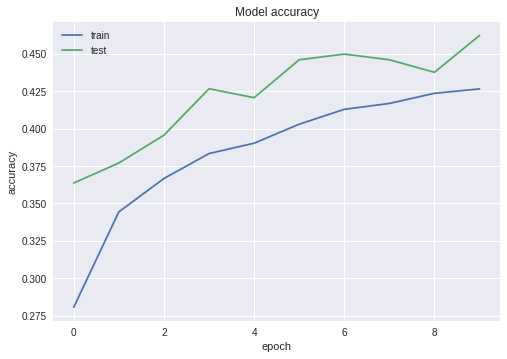

In [10]:
plotAccuracy(history1.history)

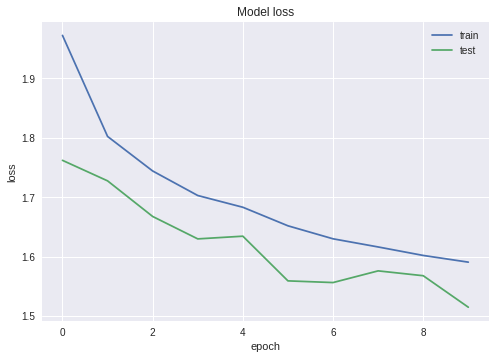

In [11]:
plotLoss(history1.history)

As you can see from the accuracy and loss plots above that the base MLP model is underfitting because of High Bias. We will try to vary epochs count and see if that affects the model accuracy

### 30 epochs

In [12]:
model2 = createMLPModel()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total para

In [13]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 1.9707 - acc: 0.2811 - val_loss: 1.8201 - val_acc: 0.3411
Epoch 2/30
 - 5s - loss: 1.8050 - acc: 0.3465 - val_loss: 1.6856 - val_acc: 0.3984
Epoch 3/30
 - 5s - loss: 1.7491 - acc: 0.3692 - val_loss: 1.6778 - val_acc: 0.4001
Epoch 4/30
 - 5s - loss: 1.7072 - acc: 0.3838 - val_loss: 1.6310 - val_acc: 0.4169
Epoch 5/30
 - 5s - loss: 1.6843 - acc: 0.3929 - val_loss: 1.6140 - val_acc: 0.4198
Epoch 6/30
 - 5s - loss: 1.6525 - acc: 0.4042 - val_loss: 1.5746 - val_acc: 0.4383
Epoch 7/30
 - 5s - loss: 1.6336 - acc: 0.4136 - val_loss: 1.5680 - val_acc: 0.4374
Epoch 8/30
 - 5s - loss: 1.6221 - acc: 0.4153 - val_loss: 1.5843 - val_acc: 0.4422
Epoch 9/30
 - 5s - loss: 1.6102 - acc: 0.4233 - val_loss: 1.5338 - val_acc: 0.4594
Epoch 10/30
 - 5s - loss: 1.5877 - acc: 0.4291 - val_loss: 1.5235 - val_acc: 0.4607
Epoch 11/30
 - 5s - loss: 1.5712 - acc: 0.4372 - val_loss: 1.5085 - val_acc: 0.4640
Epoch 12/30
 - 5s - loss: 1.5624 - 

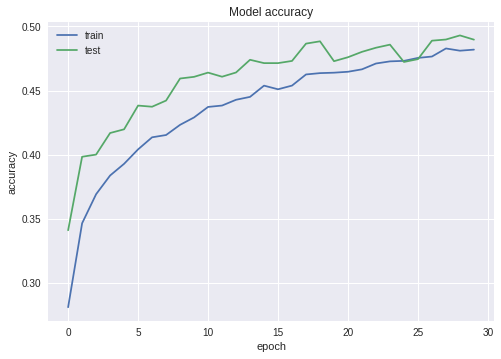

In [14]:
plotAccuracy(history2.history)

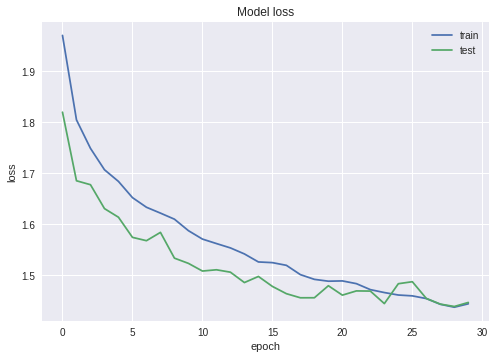

In [15]:
plotLoss(history2.history)

**As you can see from the plots above that the model is trying to converge and avoid underfitting. Hence we will try to see what happens when number of epochs is increased further**

### 50 Epochs

In [16]:
model3 = createMLPModel()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total para

In [17]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 6s - loss: 1.9757 - acc: 0.2770 - val_loss: 1.7717 - val_acc: 0.3681
Epoch 2/50
 - 5s - loss: 1.8093 - acc: 0.3462 - val_loss: 1.6892 - val_acc: 0.3988
Epoch 3/50
 - 6s - loss: 1.7486 - acc: 0.3699 - val_loss: 1.6925 - val_acc: 0.3921
Epoch 4/50
 - 5s - loss: 1.7106 - acc: 0.3799 - val_loss: 1.6668 - val_acc: 0.3966
Epoch 5/50
 - 5s - loss: 1.6829 - acc: 0.3901 - val_loss: 1.5990 - val_acc: 0.4273
Epoch 6/50
 - 5s - loss: 1.6551 - acc: 0.4020 - val_loss: 1.5785 - val_acc: 0.4401
Epoch 7/50
 - 5s - loss: 1.6301 - acc: 0.4105 - val_loss: 1.5756 - val_acc: 0.4367
Epoch 8/50
 - 5s - loss: 1.6078 - acc: 0.4197 - val_loss: 1.5725 - val_acc: 0.4450
Epoch 9/50
 - 5s - loss: 1.6081 - acc: 0.4207 - val_loss: 1.5369 - val_acc: 0.4597
Epoch 10/50
 - 5s - loss: 1.5861 - acc: 0.4268 - val_loss: 1.5469 - val_acc: 0.4534
Epoch 11/50
 - 5s - loss: 1.5721 - acc: 0.4335 - val_loss: 1.5167 - val_acc: 0.4541
Epoch 12/50
 - 5s - loss: 1.5733 - 

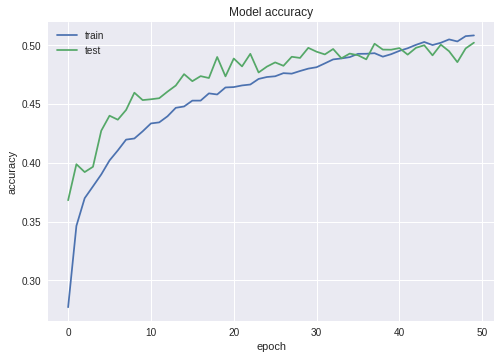

In [18]:
plotAccuracy(history3.history)

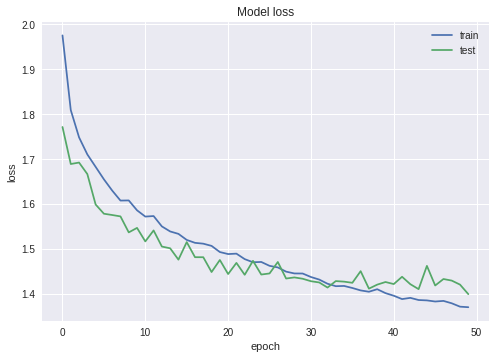

In [19]:
plotLoss(history3.history)

**There is a slight improvement in the model and model is now not underfitting**

### 100 Epochs

In [20]:
model4 = createMLPModel()
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total para

In [21]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 1.9639 - acc: 0.2829 - val_loss: 1.7393 - val_acc: 0.3753
Epoch 2/100
 - 5s - loss: 1.7973 - acc: 0.3492 - val_loss: 1.7415 - val_acc: 0.3731
Epoch 3/100
 - 5s - loss: 1.7367 - acc: 0.3745 - val_loss: 1.6289 - val_acc: 0.4242
Epoch 4/100
 - 5s - loss: 1.6966 - acc: 0.3857 - val_loss: 1.6086 - val_acc: 0.4275
Epoch 5/100
 - 5s - loss: 1.6578 - acc: 0.4032 - val_loss: 1.6292 - val_acc: 0.4199
Epoch 6/100
 - 5s - loss: 1.6369 - acc: 0.4097 - val_loss: 1.5638 - val_acc: 0.4512
Epoch 7/100
 - 5s - loss: 1.6156 - acc: 0.4178 - val_loss: 1.5342 - val_acc: 0.4513
Epoch 8/100
 - 5s - loss: 1.5986 - acc: 0.4230 - val_loss: 1.5401 - val_acc: 0.4554
Epoch 9/100
 - 5s - loss: 1.5901 - acc: 0.4310 - val_loss: 1.5299 - val_acc: 0.4469
Epoch 10/100
 - 5s - loss: 1.5700 - acc: 0.4336 - val_loss: 1.5102 - val_acc: 0.4597
Epoch 11/100
 - 5s - loss: 1.5599 - acc: 0.4405 - val_loss: 1.5035 - val_acc: 0.4668
Epoch 12/100
 - 5s - los

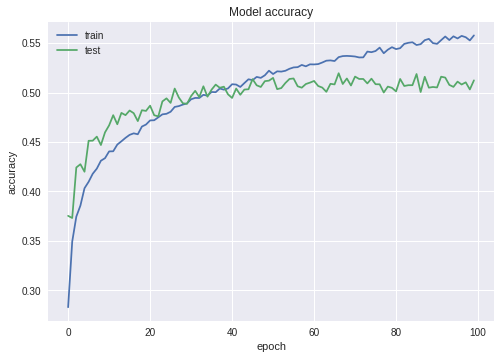

In [22]:
plotAccuracy(history4.history)

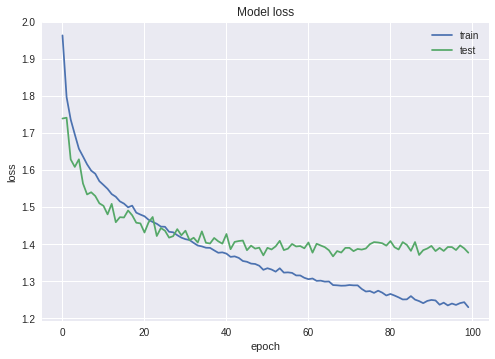

In [23]:
plotLoss(history4.history)

**As you can see that 100 epochs didn't help the model and there is still high bias and so the model is underfitting once again**

##Analysis of Variation of Epochs to MLP model

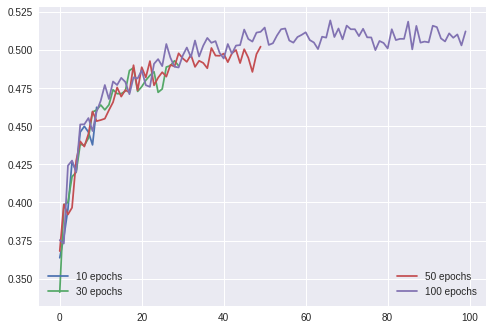

In [24]:
ax = plt.subplot(111)
plt.plot(history1.history['val_acc'], label="10 epochs")
plt.plot(history2.history['val_acc'], label="30 epochs")
plt.plot(history3.history['val_acc'], label="50 epochs")
plt.plot(history4.history['val_acc'], label="100 epochs")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

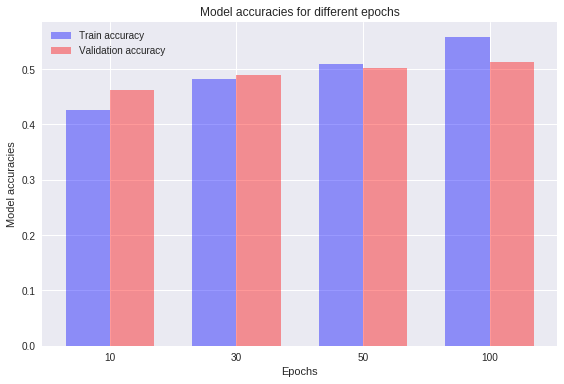

In [25]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(4)
acc_models = (history1.history['acc'].pop(), history2.history['acc'].pop(), history3.history['acc'].pop(), history4.history['acc'].pop())
val_acc_models = (history1.history['val_acc'].pop(), history2.history['val_acc'].pop(), history3.history['val_acc'].pop(),
                  history4.history['val_acc'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='b',
                label='Train accuracy')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='r',
                label='Validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Model accuracies')
ax.set_title('Model accuracies for different epochs')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('10', '30', '50', '100'))
ax.legend()
fig.tight_layout()
plt.show()

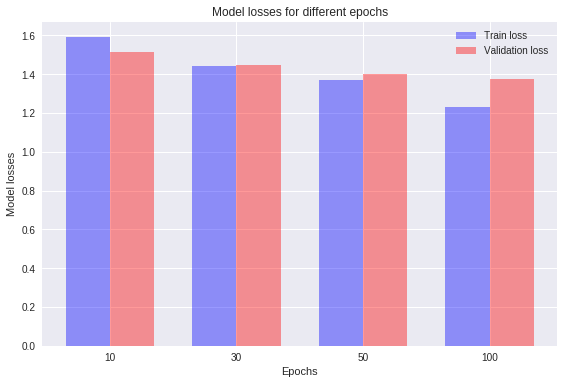

In [26]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(4)
acc_models = (history1.history['loss'].pop(), history2.history['loss'].pop(), history3.history['loss'].pop(), history4.history['loss'].pop())
val_acc_models = (history1.history['val_loss'].pop(), history2.history['val_loss'].pop(), history3.history['val_loss'].pop(),
                  history4.history['val_loss'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='b',
                label='Train loss')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='r',
                label='Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Model losses')
ax.set_title('Model losses for different epochs')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('10', '30', '50', '100'))
ax.legend()
fig.tight_layout()
plt.show()

**The above plots clearly show that 30-50 epochs are enough to train this model to maintain low bias. So we finalize number of epochs to 50 and vary other parameters.**

##Varying Batch Size


In [28]:
model_batch1 = createMLPModel()
model_batch1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total para

In [29]:
model_batch1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_batch1 = model_batch1.fit(x_train, y_train, batch_size=32, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 19s - loss: 1.9830 - acc: 0.2660 - val_loss: 1.8553 - val_acc: 0.3285
Epoch 2/50
 - 19s - loss: 1.8572 - acc: 0.3196 - val_loss: 1.7391 - val_acc: 0.3758
Epoch 3/50
 - 19s - loss: 1.8255 - acc: 0.3351 - val_loss: 1.7501 - val_acc: 0.3654
Epoch 4/50
 - 18s - loss: 1.7924 - acc: 0.3459 - val_loss: 1.7240 - val_acc: 0.3866
Epoch 5/50
 - 18s - loss: 1.7739 - acc: 0.3561 - val_loss: 1.7145 - val_acc: 0.3905
Epoch 6/50
 - 18s - loss: 1.7605 - acc: 0.3629 - val_loss: 1.6811 - val_acc: 0.4006
Epoch 7/50
 - 18s - loss: 1.7548 - acc: 0.3640 - val_loss: 1.6447 - val_acc: 0.4085
Epoch 8/50
 - 18s - loss: 1.7393 - acc: 0.3710 - val_loss: 1.6631 - val_acc: 0.3962
Epoch 9/50
 - 18s - loss: 1.7338 - acc: 0.3739 - val_loss: 1.6246 - val_acc: 0.4264
Epoch 10/50
 - 18s - loss: 1.7194 - acc: 0.3786 - val_loss: 1.6387 - val_acc: 0.4154
Epoch 11/50
 - 18s - loss: 1.7214 - acc: 0.3785 - val_loss: 1.6390 - val_acc: 0.4184
Epoch 12/50
 - 18s - los

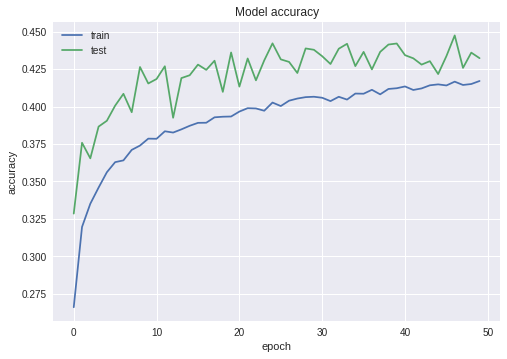

In [36]:
plotAccuracy(history_batch1.history)

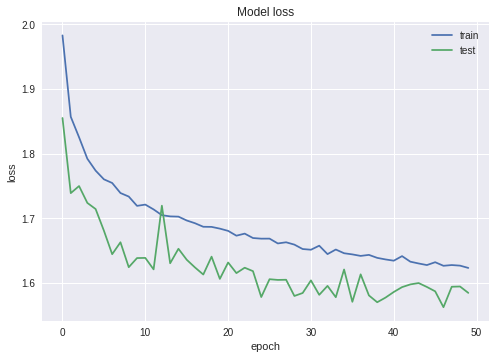

In [37]:
plotLoss(history_batch1.history)

**The above plots shows us that the network is underfitting and behaves like the base model without much improvement.**

### 64 Batch Size

In [30]:
model_batch2 = createMLPModel()
model_batch2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total para

In [31]:
model_batch2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_batch2 = model_batch2.fit(x_train, y_train, batch_size=64, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 10s - loss: 1.9631 - acc: 0.2791 - val_loss: 1.7926 - val_acc: 0.3496
Epoch 2/50
 - 10s - loss: 1.8194 - acc: 0.3392 - val_loss: 1.7242 - val_acc: 0.3750
Epoch 3/50
 - 10s - loss: 1.7649 - acc: 0.3600 - val_loss: 1.6766 - val_acc: 0.4085
Epoch 4/50
 - 10s - loss: 1.7309 - acc: 0.3728 - val_loss: 1.6830 - val_acc: 0.4087
Epoch 5/50
 - 10s - loss: 1.7028 - acc: 0.3872 - val_loss: 1.5993 - val_acc: 0.4357
Epoch 6/50
 - 10s - loss: 1.6834 - acc: 0.3928 - val_loss: 1.6009 - val_acc: 0.4220
Epoch 7/50
 - 10s - loss: 1.6670 - acc: 0.4004 - val_loss: 1.5732 - val_acc: 0.4390
Epoch 8/50
 - 10s - loss: 1.6503 - acc: 0.4057 - val_loss: 1.6353 - val_acc: 0.4025
Epoch 9/50
 - 10s - loss: 1.6372 - acc: 0.4112 - val_loss: 1.5759 - val_acc: 0.4460
Epoch 10/50
 - 10s - loss: 1.6243 - acc: 0.4140 - val_loss: 1.5602 - val_acc: 0.4447
Epoch 11/50
 - 10s - loss: 1.6132 - acc: 0.4201 - val_loss: 1.5972 - val_acc: 0.4442
Epoch 12/50
 - 10s - los

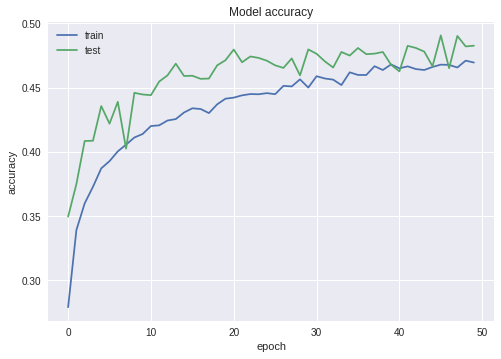

In [39]:
plotAccuracy(history_batch2.history)

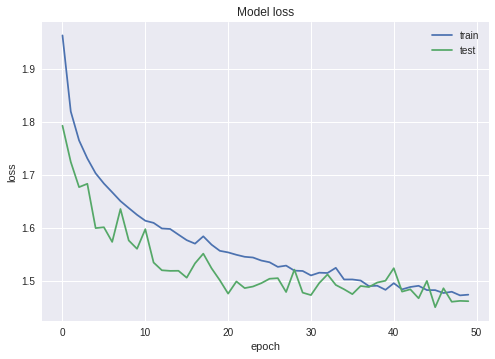

In [40]:
plotLoss(history_batch2.history)

**The network became more accurate on increasing the batch size.**

###128 Batch Size

In [32]:
model_batch3 = createMLPModel()
model_batch3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                5130      
Total para

In [33]:
model_batch3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_batch3 = model_batch3.fit(x_train, y_train, batch_size=128, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 6s - loss: 1.9610 - acc: 0.2841 - val_loss: 1.7340 - val_acc: 0.3804
Epoch 2/50
 - 5s - loss: 1.7979 - acc: 0.3479 - val_loss: 1.7062 - val_acc: 0.3936
Epoch 3/50
 - 5s - loss: 1.7347 - acc: 0.3708 - val_loss: 1.6788 - val_acc: 0.4127
Epoch 4/50
 - 5s - loss: 1.6994 - acc: 0.3854 - val_loss: 1.6369 - val_acc: 0.4244
Epoch 5/50
 - 5s - loss: 1.6677 - acc: 0.3978 - val_loss: 1.5886 - val_acc: 0.4366
Epoch 6/50
 - 5s - loss: 1.6472 - acc: 0.4053 - val_loss: 1.5551 - val_acc: 0.4532
Epoch 7/50
 - 5s - loss: 1.6250 - acc: 0.4112 - val_loss: 1.5878 - val_acc: 0.4207
Epoch 8/50
 - 5s - loss: 1.6194 - acc: 0.4117 - val_loss: 1.5721 - val_acc: 0.4406
Epoch 9/50
 - 5s - loss: 1.6085 - acc: 0.4196 - val_loss: 1.5521 - val_acc: 0.4518
Epoch 10/50
 - 5s - loss: 1.5882 - acc: 0.4283 - val_loss: 1.5118 - val_acc: 0.4695
Epoch 11/50
 - 5s - loss: 1.5718 - acc: 0.4331 - val_loss: 1.5038 - val_acc: 0.4607
Epoch 12/50
 - 5s - loss: 1.5710 - 

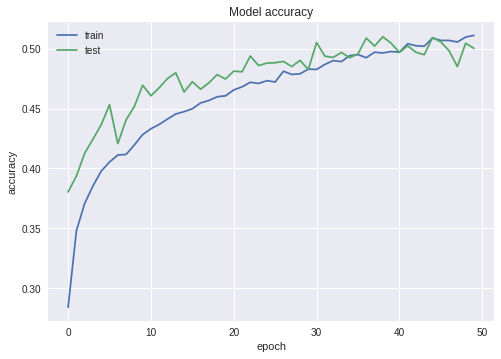

In [41]:
plotAccuracy(history_batch3.history)

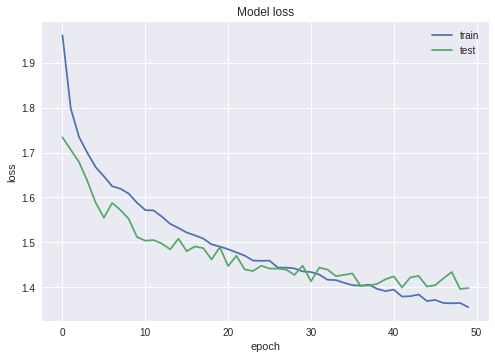

In [42]:
plotLoss(history_batch3.history)

**The model accuracy is increased by 3% on further increasing the batch size.**

### 256 Batch Size

In [34]:
model_batch4 = createMLPModel()
model_batch4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total para

In [35]:
model_batch4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_batch4 = model_batch4.fit(x_train, y_train, batch_size=256, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 1.9872 - acc: 0.2730 - val_loss: 1.7792 - val_acc: 0.3555
Epoch 2/50
 - 3s - loss: 1.7915 - acc: 0.3523 - val_loss: 1.6857 - val_acc: 0.4106
Epoch 3/50
 - 3s - loss: 1.7350 - acc: 0.3751 - val_loss: 1.6667 - val_acc: 0.3988
Epoch 4/50
 - 3s - loss: 1.6950 - acc: 0.3906 - val_loss: 1.5962 - val_acc: 0.4352
Epoch 5/50
 - 3s - loss: 1.6613 - acc: 0.4028 - val_loss: 1.6144 - val_acc: 0.4225
Epoch 6/50
 - 3s - loss: 1.6328 - acc: 0.4120 - val_loss: 1.5513 - val_acc: 0.4427
Epoch 7/50
 - 3s - loss: 1.5967 - acc: 0.4260 - val_loss: 1.5725 - val_acc: 0.4383
Epoch 8/50
 - 3s - loss: 1.5848 - acc: 0.4309 - val_loss: 1.5203 - val_acc: 0.4518
Epoch 9/50
 - 3s - loss: 1.5622 - acc: 0.4380 - val_loss: 1.4849 - val_acc: 0.4719
Epoch 10/50
 - 3s - loss: 1.5491 - acc: 0.4426 - val_loss: 1.5065 - val_acc: 0.4733
Epoch 11/50
 - 3s - loss: 1.5340 - acc: 0.4486 - val_loss: 1.5022 - val_acc: 0.4638
Epoch 12/50
 - 3s - loss: 1.5334 - 

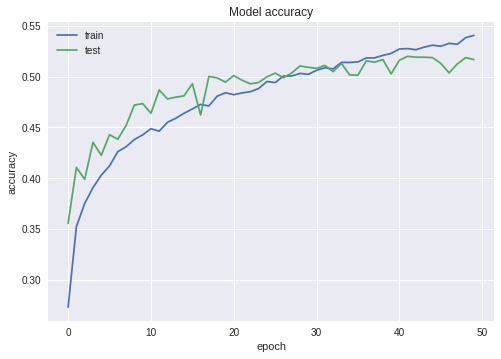

In [43]:
plotAccuracy(history_batch4.history)

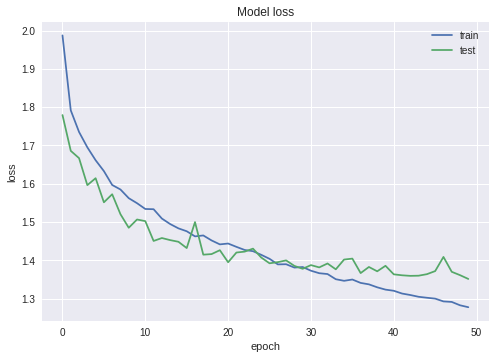

In [44]:
plotLoss(history_batch4.history)

**The model accuracy further increases by approx 2% with not much difference in training and validation losses.**

### 512 Batch Size

In [46]:
model_batch5 = createMLPModel()
model_batch5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_25 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total para

In [47]:
model_batch5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_batch5 = model_batch5.fit(x_train, y_train, batch_size=512, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 2.0475 - acc: 0.2506 - val_loss: 1.8003 - val_acc: 0.3592
Epoch 2/50
 - 3s - loss: 1.8021 - acc: 0.3483 - val_loss: 1.6896 - val_acc: 0.3949
Epoch 3/50
 - 3s - loss: 1.7247 - acc: 0.3769 - val_loss: 1.6369 - val_acc: 0.4251
Epoch 4/50
 - 2s - loss: 1.6772 - acc: 0.3993 - val_loss: 1.5852 - val_acc: 0.4411
Epoch 5/50
 - 2s - loss: 1.6378 - acc: 0.4126 - val_loss: 1.5670 - val_acc: 0.4483
Epoch 6/50
 - 2s - loss: 1.6088 - acc: 0.4221 - val_loss: 1.5724 - val_acc: 0.4337
Epoch 7/50
 - 2s - loss: 1.5889 - acc: 0.4313 - val_loss: 1.5063 - val_acc: 0.4634
Epoch 8/50
 - 2s - loss: 1.5708 - acc: 0.4349 - val_loss: 1.4864 - val_acc: 0.4705
Epoch 9/50
 - 2s - loss: 1.5548 - acc: 0.4403 - val_loss: 1.4845 - val_acc: 0.4678
Epoch 10/50
 - 2s - loss: 1.5392 - acc: 0.4456 - val_loss: 1.4707 - val_acc: 0.4748
Epoch 11/50
 - 2s - loss: 1.5162 - acc: 0.4549 - val_loss: 1.4688 - val_acc: 0.4794
Epoch 12/50
 - 2s - loss: 1.5137 - 

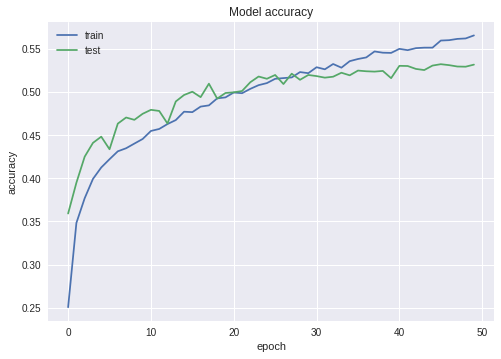

In [50]:
plotAccuracy(history_batch5.history)

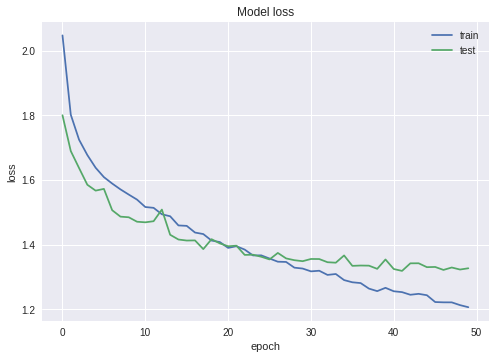

In [49]:
plotLoss(history_batch5.history)

**The model accuracy further increased by approx 1% but there is more increase in the difference between training and validation loss.**

##Analysis of varying Batch Size

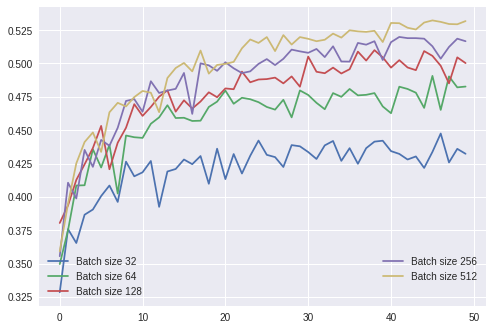

In [48]:
ax = plt.subplot(111)
plt.plot(history_batch1.history['val_acc'], label="Batch size 32")
plt.plot(history_batch2.history['val_acc'], label="Batch size 64")
plt.plot(history_batch3.history['val_acc'], label="Batch size 128")
plt.plot(history_batch4.history['val_acc'], label="Batch size 256")
plt.plot(history_batch5.history['val_acc'], label="Batch size 512")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

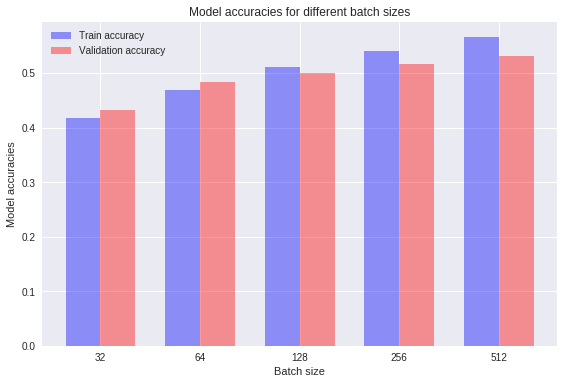

In [51]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_batch1.history['acc'].pop(), history_batch2.history['acc'].pop(), history_batch3.history['acc'].pop(),
              history_batch4.history['acc'].pop(), history_batch5.history['acc'].pop())
val_acc_models = (history_batch1.history['val_acc'].pop(), history_batch2.history['val_acc'].pop(), history_batch3.history['val_acc'].pop(),
                  history_batch4.history['val_acc'].pop(), history_batch5.history['val_acc'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='b',
                label='Train accuracy')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='r',
                label='Validation accuracy')
ax.set_xlabel('Batch size')
ax.set_ylabel('Model accuracies')
ax.set_title('Model accuracies for different batch sizes')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('32', '64', '128', '256', '512'))
ax.legend()
fig.tight_layout()
plt.show()

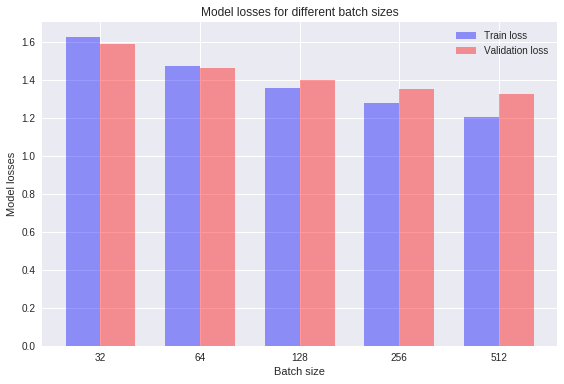

In [52]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_batch1.history['loss'].pop(), history_batch2.history['loss'].pop(), history_batch3.history['loss'].pop(),
              history_batch4.history['loss'].pop(), history_batch5.history['loss'].pop())
val_acc_models = (history_batch1.history['val_loss'].pop(), history_batch2.history['val_loss'].pop(), history_batch3.history['val_loss'].pop(),
                  history_batch4.history['val_loss'].pop(), history_batch5.history['val_loss'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='b',
                label='Train loss')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='r',
                label='Validation loss')
ax.set_xlabel('Batch size')
ax.set_ylabel('Model losses')
ax.set_title('Model losses for different batch sizes')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('32', '64', '128', '256', '512'))
ax.legend()
fig.tight_layout()
plt.show()

**The above plots shows us that as the batch size increases, the model becomes more and more accurate untill a certain point when the loss starts to increase again. Hence we fix batch size to 256.**

##Varying Learning Rate
### Rate = 0.001

In [67]:
model_lr1 = createMLPModel()
model_lr1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_46 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_48 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)                5130      
Total para

In [68]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_lr1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_lr1 = model_lr1.fit(x_train, y_train, batch_size=256, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 1.9805 - acc: 0.2756 - val_loss: 1.8080 - val_acc: 0.3322
Epoch 2/50
 - 3s - loss: 1.7969 - acc: 0.3520 - val_loss: 1.6769 - val_acc: 0.4041
Epoch 3/50
 - 3s - loss: 1.7420 - acc: 0.3737 - val_loss: 1.6836 - val_acc: 0.3924
Epoch 4/50
 - 3s - loss: 1.6903 - acc: 0.3910 - val_loss: 1.6257 - val_acc: 0.4243
Epoch 5/50
 - 3s - loss: 1.6628 - acc: 0.4031 - val_loss: 1.5838 - val_acc: 0.4305
Epoch 6/50
 - 3s - loss: 1.6423 - acc: 0.4086 - val_loss: 1.5185 - val_acc: 0.4528
Epoch 7/50
 - 3s - loss: 1.6045 - acc: 0.4222 - val_loss: 1.5316 - val_acc: 0.4443
Epoch 8/50
 - 3s - loss: 1.5792 - acc: 0.4298 - val_loss: 1.5195 - val_acc: 0.4566
Epoch 9/50
 - 3s - loss: 1.5687 - acc: 0.4359 - val_loss: 1.5335 - val_acc: 0.4489
Epoch 10/50
 - 3s - loss: 1.5551 - acc: 0.4389 - val_loss: 1.5036 - val_acc: 0.4644
Epoch 11/50
 - 3s - loss: 1.5387 - acc: 0.4458 - val_loss: 1.4717 - val_acc: 0.4749
Epoch 12/50
 - 3s - loss: 1.5243 - 

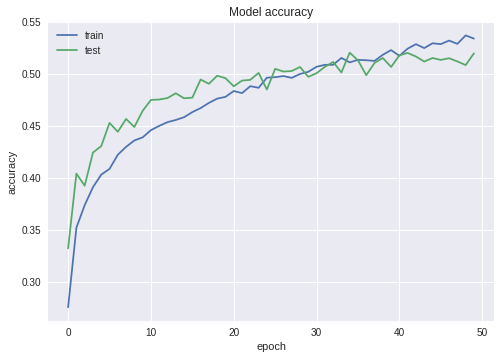

In [69]:
plotAccuracy(history_lr1.history)

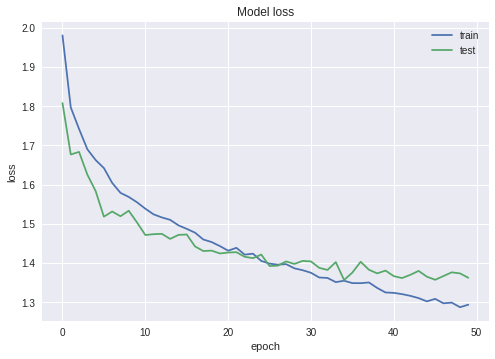

In [70]:
plotLoss(history_lr1.history)

**The learning rate seems proper enough. The model did converge with decent accuracy.**

### Rate - 0.002

In [71]:
model_lr2 = createMLPModel()
model_lr2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_49 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_50 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_51 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 10)                5130      
Total para

In [72]:
adam = optimizers.Adam(lr=0.002, decay=0.000001)
model_lr2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_lr2 = model_lr2.fit(x_train, y_train, batch_size=256, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 2.0878 - acc: 0.2468 - val_loss: 1.8190 - val_acc: 0.3398
Epoch 2/50
 - 3s - loss: 1.8492 - acc: 0.3285 - val_loss: 1.7281 - val_acc: 0.3834
Epoch 3/50
 - 3s - loss: 1.7863 - acc: 0.3535 - val_loss: 1.6831 - val_acc: 0.3950
Epoch 4/50
 - 3s - loss: 1.7512 - acc: 0.3670 - val_loss: 1.6683 - val_acc: 0.4108
Epoch 5/50
 - 3s - loss: 1.7263 - acc: 0.3739 - val_loss: 1.6272 - val_acc: 0.4212
Epoch 6/50
 - 3s - loss: 1.6955 - acc: 0.3865 - val_loss: 1.6072 - val_acc: 0.4245
Epoch 7/50
 - 3s - loss: 1.6789 - acc: 0.3936 - val_loss: 1.6183 - val_acc: 0.4181
Epoch 8/50
 - 3s - loss: 1.6626 - acc: 0.4016 - val_loss: 1.5895 - val_acc: 0.4356
Epoch 9/50
 - 3s - loss: 1.6506 - acc: 0.4025 - val_loss: 1.5760 - val_acc: 0.4441
Epoch 10/50
 - 3s - loss: 1.6467 - acc: 0.4068 - val_loss: 1.5559 - val_acc: 0.4377
Epoch 11/50
 - 3s - loss: 1.6282 - acc: 0.4125 - val_loss: 1.5608 - val_acc: 0.4473
Epoch 12/50
 - 3s - loss: 1.6192 - 

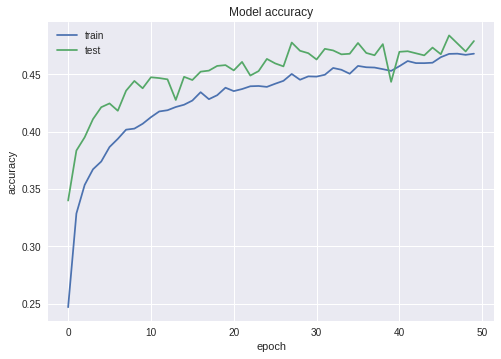

In [73]:
plotAccuracy(history_lr2.history)

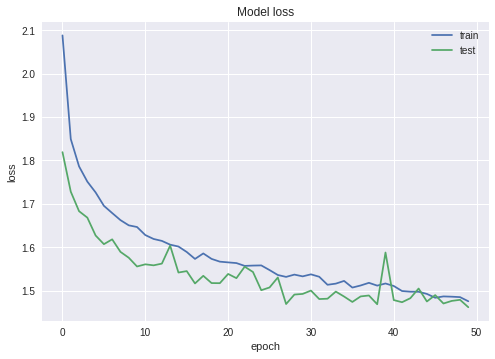

In [74]:
plotLoss(history_lr2.history)

**On increasing the rate by 0.001, there is a slight decrease in the model accuracy and probably the model is taking more time to converge.**

### Rate - 0.005

In [76]:
model_lr3 = createMLPModel()
model_lr3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_55 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_74 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_57 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 10)                5130      
Total para

In [77]:
adam = optimizers.Adam(lr=0.005, decay=0.000001)
model_lr3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_lr3 = model_lr3.fit(x_train, y_train, batch_size=256, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 14.4283 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
 

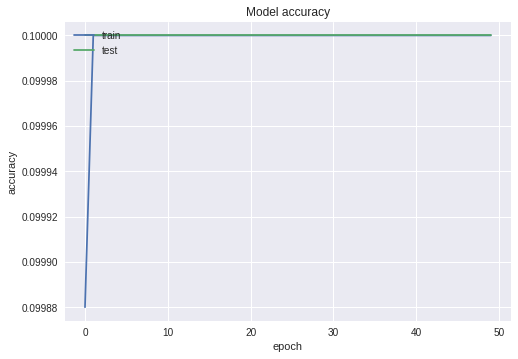

In [78]:
plotAccuracy(history_lr3.history)

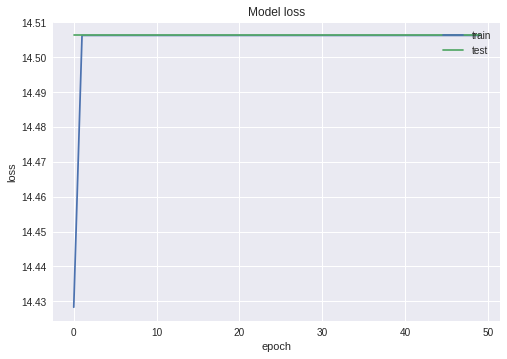

In [79]:
plotLoss(history_lr3.history)

**The model is stuck on a local minima and the step size is too big for the model to come out of it for 50 epochs.**

### Rate - 0.01

In [80]:
model_lr4 = createMLPModel()
model_lr4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_58 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_60 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 10)                5130      
Total para

In [81]:
adam = optimizers.Adam(lr=0.01, decay=0.000001)
model_lr4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_lr4 = model_lr4.fit(x_train, y_train, batch_size=256, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 14.4434 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
 - 3s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
 

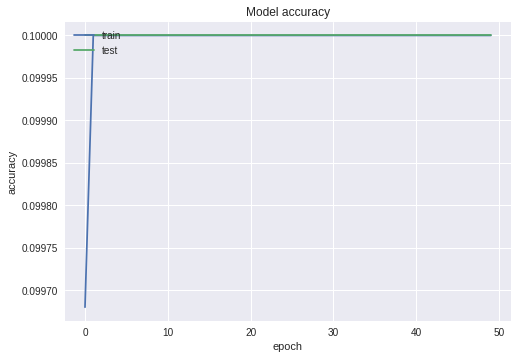

In [82]:
plotAccuracy(history_lr4.history)

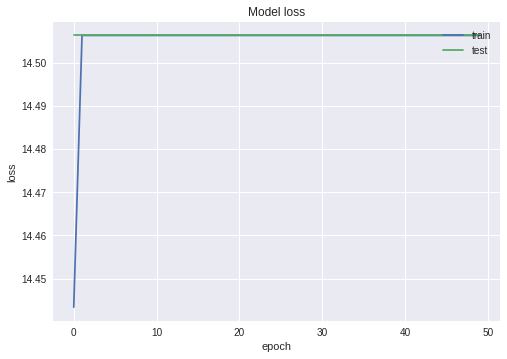

In [83]:
plotLoss(history_lr4.history)

**Increasing the learning rate further generally doesn't help and it can be seen from the plots above.**

### Rate - 0.0001

In [84]:
model_lr5 = createMLPModel()
model_lr5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_61 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_63 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 10)                5130      
Total para

In [85]:
adam = optimizers.Adam(lr=0.0001, decay=0.000001)
model_lr5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_lr5 = model_lr5.fit(x_train, y_train, batch_size=256, epochs=50, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 5s - loss: 1.9756 - acc: 0.2807 - val_loss: 1.7708 - val_acc: 0.3674
Epoch 2/50
 - 3s - loss: 1.7726 - acc: 0.3638 - val_loss: 1.6700 - val_acc: 0.4023
Epoch 3/50
 - 3s - loss: 1.6891 - acc: 0.3978 - val_loss: 1.6204 - val_acc: 0.4254
Epoch 4/50
 - 3s - loss: 1.6289 - acc: 0.4199 - val_loss: 1.5504 - val_acc: 0.4522
Epoch 5/50
 - 3s - loss: 1.5907 - acc: 0.4352 - val_loss: 1.5149 - val_acc: 0.4628
Epoch 6/50
 - 3s - loss: 1.5525 - acc: 0.4502 - val_loss: 1.5057 - val_acc: 0.4601
Epoch 7/50
 - 3s - loss: 1.5172 - acc: 0.4621 - val_loss: 1.4730 - val_acc: 0.4753
Epoch 8/50
 - 3s - loss: 1.4875 - acc: 0.4712 - val_loss: 1.4433 - val_acc: 0.4820
Epoch 9/50
 - 3s - loss: 1.4662 - acc: 0.4797 - val_loss: 1.4334 - val_acc: 0.4866
Epoch 10/50
 - 3s - loss: 1.4419 - acc: 0.4909 - val_loss: 1.4082 - val_acc: 0.4996
Epoch 11/50
 - 3s - loss: 1.4171 - acc: 0.4984 - val_loss: 1.4064 - val_acc: 0.5029
Epoch 12/50
 - 3s - loss: 1.3962 - 

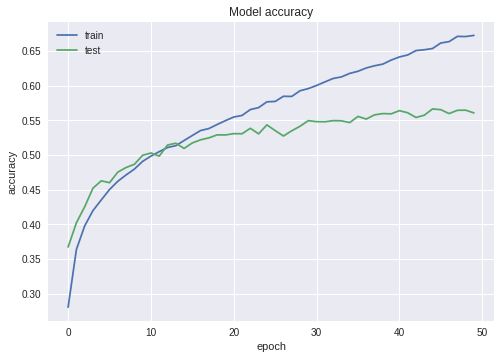

In [86]:
plotAccuracy(history_lr5.history)

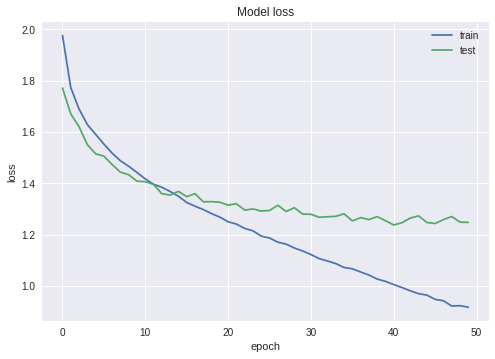

In [87]:
plotLoss(history_lr5.history)

**The model did give a higher accuracy on decreasing the learning rate but there was a high bias induced in the model and so the model is underfitting.**

##Analysis of varying learning rate

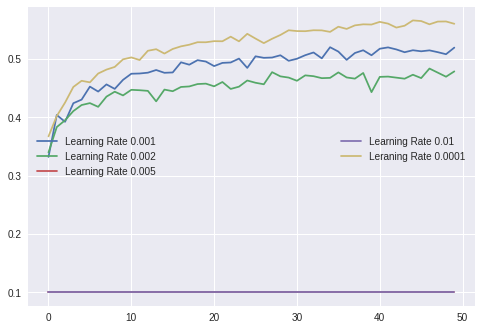

In [88]:
ax = plt.subplot(111)
plt.plot(history_lr1.history['val_acc'], label="Learning Rate 0.001")
plt.plot(history_lr2.history['val_acc'], label="Learning Rate 0.002")
plt.plot(history_lr3.history['val_acc'], label="Learning Rate 0.005")
plt.plot(history_lr4.history['val_acc'], label="Learning Rate 0.01")
plt.plot(history_lr5.history['val_acc'], label="Leraning Rate 0.0001")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

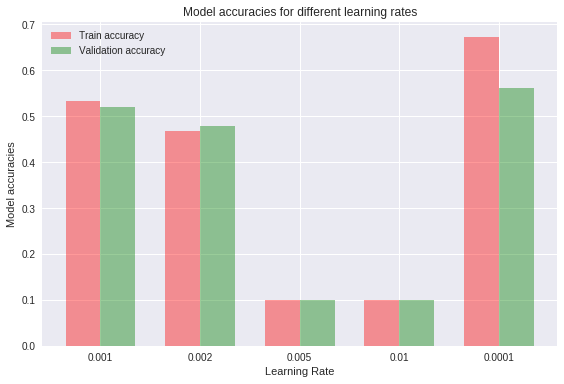

In [89]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_lr1.history['acc'].pop(), history_lr2.history['acc'].pop(), history_lr3.history['acc'].pop(),
              history_lr4.history['acc'].pop(), history_lr5.history['acc'].pop())
val_acc_models = (history_lr1.history['val_acc'].pop(), history_lr2.history['val_acc'].pop(), history_lr3.history['val_acc'].pop(),
                  history_lr4.history['val_acc'].pop(), history_lr5.history['val_acc'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train accuracy')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation accuracy')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Model accuracies')
ax.set_title('Model accuracies for different learning rates')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('0.001', '0.002', '0.005', '0.01', '0.0001'))
ax.legend()
fig.tight_layout()
plt.show()

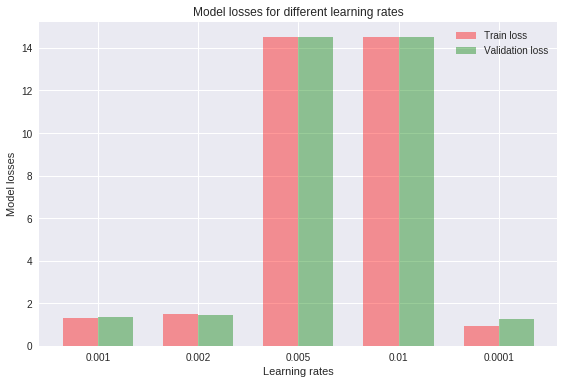

In [90]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_lr1.history['loss'].pop(), history_lr2.history['loss'].pop(), history_lr3.history['loss'].pop(),
              history_lr4.history['loss'].pop(), history_lr5.history['loss'].pop())
val_acc_models = (history_lr1.history['val_loss'].pop(), history_lr2.history['val_loss'].pop(), history_lr3.history['val_loss'].pop(),
                  history_lr4.history['val_loss'].pop(), history_lr5.history['val_loss'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train loss')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation loss')
ax.set_xlabel('Learning rates')
ax.set_ylabel('Model losses')
ax.set_title('Model losses for different learning rates')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('0.001', '0.002', '0.005', '0.01', '0.0001'))
ax.legend()
fig.tight_layout()
plt.show()

**So we decide to select learning rate of 0.001 and to avoid underfitting, we will run it till 30 epochs only with batch size as 256. Because with rate as 0.001, there was no difference to the model between 30 & 50 epochs**

##Varying Dropout rate
### dropout rate - 0.1

In [102]:
model_dr1 = createMLPModel(dropoutRate=[0.1, 0.1, 0.1])
model_dr1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_76 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_77 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_78 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 10)                5130      
Total para

In [103]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_dr1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_dr1 = model_dr1.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 5s - loss: 1.9737 - acc: 0.2795 - val_loss: 1.8058 - val_acc: 0.3382
Epoch 2/30
 - 3s - loss: 1.7372 - acc: 0.3748 - val_loss: 1.6818 - val_acc: 0.3996
Epoch 3/30
 - 3s - loss: 1.6646 - acc: 0.4009 - val_loss: 1.5611 - val_acc: 0.4502
Epoch 4/30
 - 3s - loss: 1.6009 - acc: 0.4262 - val_loss: 1.5554 - val_acc: 0.4449
Epoch 5/30
 - 3s - loss: 1.5651 - acc: 0.4378 - val_loss: 1.4843 - val_acc: 0.4700
Epoch 6/30
 - 3s - loss: 1.5232 - acc: 0.4526 - val_loss: 1.4899 - val_acc: 0.4660
Epoch 7/30
 - 3s - loss: 1.4923 - acc: 0.4648 - val_loss: 1.4637 - val_acc: 0.4824
Epoch 8/30
 - 3s - loss: 1.4777 - acc: 0.4696 - val_loss: 1.4250 - val_acc: 0.4920
Epoch 9/30
 - 3s - loss: 1.4507 - acc: 0.4800 - val_loss: 1.4411 - val_acc: 0.4881
Epoch 10/30
 - 3s - loss: 1.4307 - acc: 0.4872 - val_loss: 1.4258 - val_acc: 0.4981
Epoch 11/30
 - 3s - loss: 1.4042 - acc: 0.4952 - val_loss: 1.4311 - val_acc: 0.4888
Epoch 12/30
 - 3s - loss: 1.3876 - 

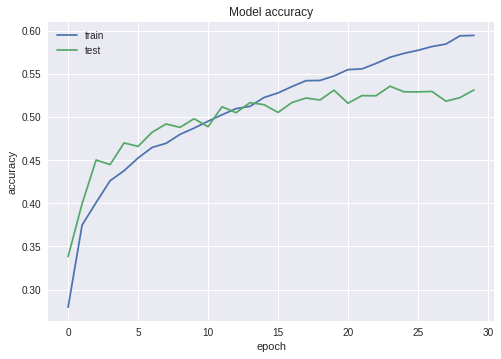

In [104]:
plotAccuracy(history_dr1.history)

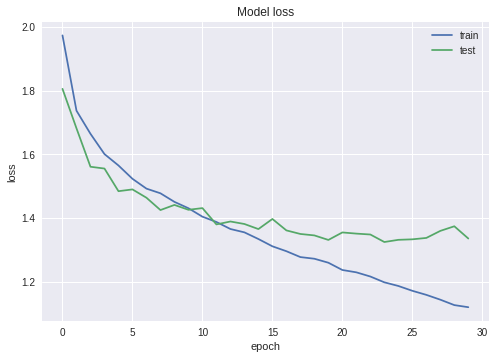

In [105]:
plotLoss(history_dr1.history)

**The model is underfitting and inaccurate with dropout rate as 0.1**

### Dropout rate 0.2

In [106]:
model_dr2 = createMLPModel(dropoutRate=[0.2, 0.2, 0.2])
model_dr2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_79 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_106 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_80 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_81 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 10)                5130      
Total para

In [107]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_dr2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_dr2 = model_dr2.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 1.9980 - acc: 0.2682 - val_loss: 1.7924 - val_acc: 0.3457
Epoch 2/30
 - 3s - loss: 1.7947 - acc: 0.3500 - val_loss: 1.7076 - val_acc: 0.3898
Epoch 3/30
 - 3s - loss: 1.7334 - acc: 0.3747 - val_loss: 1.6564 - val_acc: 0.4078
Epoch 4/30
 - 3s - loss: 1.6852 - acc: 0.3935 - val_loss: 1.6536 - val_acc: 0.4192
Epoch 5/30
 - 3s - loss: 1.6506 - acc: 0.4055 - val_loss: 1.5884 - val_acc: 0.4349
Epoch 6/30
 - 3s - loss: 1.6212 - acc: 0.4193 - val_loss: 1.5317 - val_acc: 0.4543
Epoch 7/30
 - 3s - loss: 1.5959 - acc: 0.4260 - val_loss: 1.5374 - val_acc: 0.4476
Epoch 8/30
 - 3s - loss: 1.5746 - acc: 0.4327 - val_loss: 1.5229 - val_acc: 0.4628
Epoch 9/30
 - 3s - loss: 1.5498 - acc: 0.4433 - val_loss: 1.4974 - val_acc: 0.4677
Epoch 10/30
 - 3s - loss: 1.5383 - acc: 0.4462 - val_loss: 1.4792 - val_acc: 0.4768
Epoch 11/30
 - 3s - loss: 1.5274 - acc: 0.4515 - val_loss: 1.5082 - val_acc: 0.4660
Epoch 12/30
 - 3s - loss: 1.5136 - 

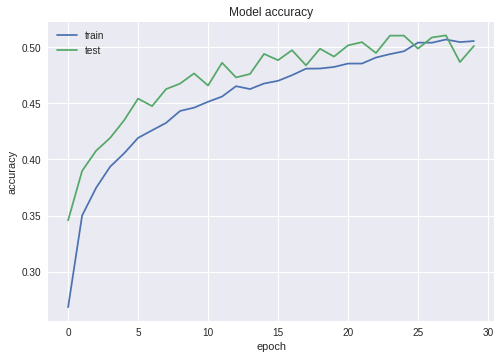

In [108]:
plotAccuracy(history_dr2.history)

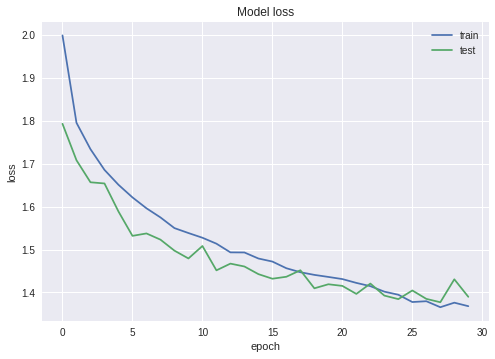

In [109]:
plotLoss(history_dr2.history)

**There is a balance between the training and testing accuracies and losses.**

### Dropout rate 0.3

In [110]:
model_dr3 = createMLPModel(dropoutRate=[0.3, 0.3, 0.3])
model_dr3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_82 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_110 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_83 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_84 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 10)                5130      
Total para

In [111]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_dr3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_dr3 = model_dr3.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 2.0343 - acc: 0.2527 - val_loss: 1.8604 - val_acc: 0.3257
Epoch 2/30
 - 4s - loss: 1.8602 - acc: 0.3274 - val_loss: 1.7702 - val_acc: 0.3642
Epoch 3/30
 - 4s - loss: 1.8139 - acc: 0.3417 - val_loss: 1.7102 - val_acc: 0.3935
Epoch 4/30
 - 4s - loss: 1.7754 - acc: 0.3567 - val_loss: 1.6984 - val_acc: 0.4082
Epoch 5/30
 - 3s - loss: 1.7502 - acc: 0.3627 - val_loss: 1.6470 - val_acc: 0.4164
Epoch 6/30
 - 3s - loss: 1.7185 - acc: 0.3765 - val_loss: 1.6337 - val_acc: 0.4212
Epoch 7/30
 - 3s - loss: 1.7091 - acc: 0.3793 - val_loss: 1.6262 - val_acc: 0.4340
Epoch 8/30
 - 3s - loss: 1.6979 - acc: 0.3841 - val_loss: 1.6559 - val_acc: 0.4195
Epoch 9/30
 - 3s - loss: 1.6794 - acc: 0.3906 - val_loss: 1.6099 - val_acc: 0.4405
Epoch 10/30
 - 3s - loss: 1.6606 - acc: 0.3976 - val_loss: 1.6352 - val_acc: 0.4367
Epoch 11/30
 - 3s - loss: 1.6416 - acc: 0.4075 - val_loss: 1.5688 - val_acc: 0.4542
Epoch 12/30
 - 3s - loss: 1.6415 - 

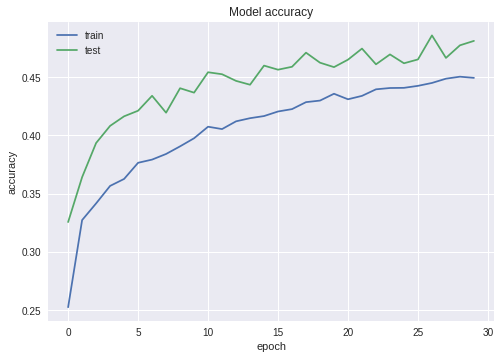

In [112]:
plotAccuracy(history_dr3.history)

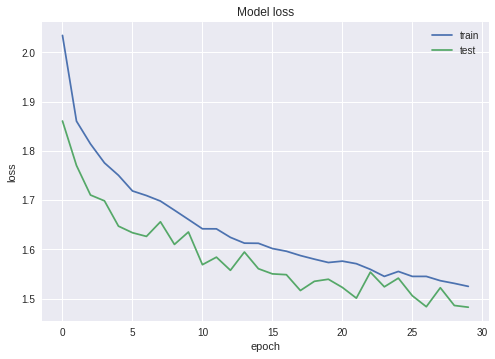

In [113]:
plotLoss(history_dr3.history)

**There is an issue in model converging probably because more number of relevant neuron weights are dropped and retraining them takes more than 30 epochs.**

### Dropout rate 0.4

In [114]:
model_dr4 = createMLPModel(dropoutRate=[0.4, 0.4, 0.4])
model_dr4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_85 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_114 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_86 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_87 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 10)                5130      
Total para

In [115]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_dr4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_dr4 = model_dr4.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 2.0810 - acc: 0.2289 - val_loss: 1.8627 - val_acc: 0.3294
Epoch 2/30
 - 3s - loss: 1.9313 - acc: 0.2868 - val_loss: 1.8468 - val_acc: 0.3405
Epoch 3/30
 - 4s - loss: 1.8863 - acc: 0.3044 - val_loss: 1.8175 - val_acc: 0.3503
Epoch 4/30
 - 3s - loss: 1.8713 - acc: 0.3057 - val_loss: 1.8182 - val_acc: 0.3483
Epoch 5/30
 - 3s - loss: 1.8500 - acc: 0.3177 - val_loss: 1.8247 - val_acc: 0.3673
Epoch 6/30
 - 3s - loss: 1.8247 - acc: 0.3273 - val_loss: 1.7751 - val_acc: 0.3873
Epoch 7/30
 - 3s - loss: 1.8086 - acc: 0.3389 - val_loss: 1.7875 - val_acc: 0.3708
Epoch 8/30
 - 3s - loss: 1.8067 - acc: 0.3386 - val_loss: 1.7573 - val_acc: 0.3896
Epoch 9/30
 - 3s - loss: 1.7810 - acc: 0.3502 - val_loss: 1.7471 - val_acc: 0.3838
Epoch 10/30
 - 3s - loss: 1.7701 - acc: 0.3536 - val_loss: 1.7415 - val_acc: 0.3920
Epoch 11/30
 - 3s - loss: 1.7772 - acc: 0.3505 - val_loss: 1.7317 - val_acc: 0.4024
Epoch 12/30
 - 3s - loss: 1.7632 - 

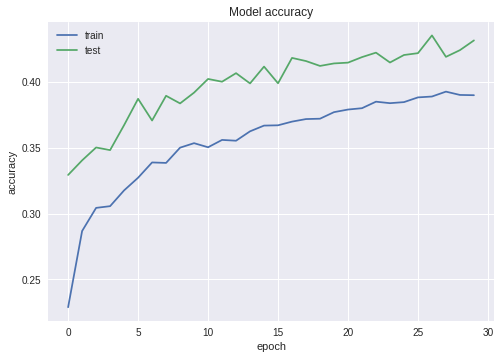

In [117]:
plotAccuracy(history_dr4.history)

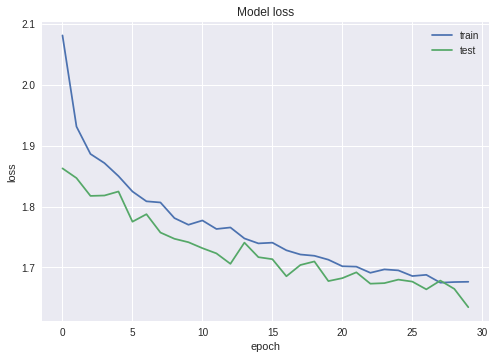

In [118]:
plotLoss(history_dr4.history)

**There is an issue in model converging probably because more number of relevant neuron weights are dropped and retraining them takes more than 30 epochs.**

### Dropout rate 0.3 with 100 epochs

In [124]:
model_dr5 = createMLPModel(dropoutRate=[0.3, 0.3, 0.3])
model_dr5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_94 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_126 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_95 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_96 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 10)                5130      
Total para

In [125]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_dr5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_dr5 = model_dr5.fit(x_train, y_train, batch_size=256, epochs=100, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 6s - loss: 2.0283 - acc: 0.2551 - val_loss: 1.8147 - val_acc: 0.3557
Epoch 2/100
 - 3s - loss: 1.8529 - acc: 0.3251 - val_loss: 1.7541 - val_acc: 0.3678
Epoch 3/100
 - 3s - loss: 1.8120 - acc: 0.3412 - val_loss: 1.7214 - val_acc: 0.3901
Epoch 4/100
 - 3s - loss: 1.7751 - acc: 0.3564 - val_loss: 1.6877 - val_acc: 0.4018
Epoch 5/100
 - 3s - loss: 1.7415 - acc: 0.3704 - val_loss: 1.6819 - val_acc: 0.4183
Epoch 6/100
 - 3s - loss: 1.7256 - acc: 0.3740 - val_loss: 1.6344 - val_acc: 0.4238
Epoch 7/100
 - 3s - loss: 1.7028 - acc: 0.3846 - val_loss: 1.6531 - val_acc: 0.4169
Epoch 8/100
 - 3s - loss: 1.6817 - acc: 0.3900 - val_loss: 1.6246 - val_acc: 0.4356
Epoch 9/100
 - 3s - loss: 1.6578 - acc: 0.4000 - val_loss: 1.5801 - val_acc: 0.4450
Epoch 10/100
 - 3s - loss: 1.6526 - acc: 0.4035 - val_loss: 1.6046 - val_acc: 0.4444
Epoch 11/100
 - 3s - loss: 1.6512 - acc: 0.4027 - val_loss: 1.5996 - val_acc: 0.4419
Epoch 12/100
 - 3s - los

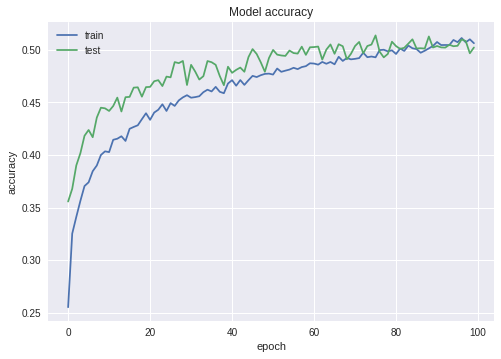

In [126]:
plotAccuracy(history_dr5.history)

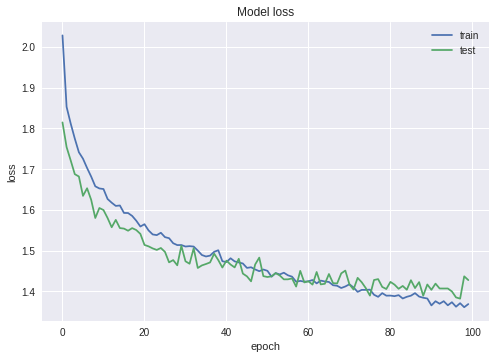

In [127]:
plotLoss(history_dr5.history)

**The accuracy provided by this model is approximately same as the one with dropout rate 0.2(with 30 epochs only). Hence this model is not the preferred one.**

##Analysis of variation of dropout rate

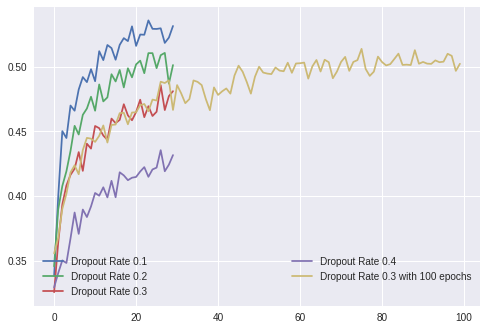

In [129]:
ax = plt.subplot(111)
plt.plot(history_dr1.history['val_acc'], label="Dropout Rate 0.1")
plt.plot(history_dr2.history['val_acc'], label="Dropout Rate 0.2")
plt.plot(history_dr3.history['val_acc'], label="Dropout Rate 0.3")
plt.plot(history_dr4.history['val_acc'], label="Dropout Rate 0.4")
plt.plot(history_dr5.history['val_acc'], label="Dropout Rate 0.3 with 100 epochs")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

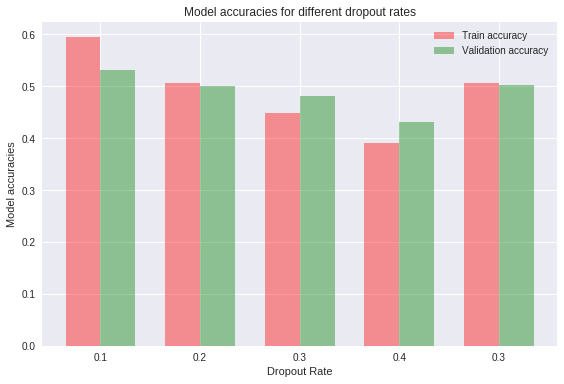

In [132]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_dr1.history['acc'].pop(), history_dr2.history['acc'].pop(), history_dr3.history['acc'].pop(),
              history_dr4.history['acc'].pop(), history_dr5.history['acc'].pop())
val_acc_models = (history_dr1.history['val_acc'].pop(), history_dr2.history['val_acc'].pop(), history_dr3.history['val_acc'].pop(),
                  history_dr4.history['val_acc'].pop(), history_dr5.history['val_acc'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train accuracy')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation accuracy')
ax.set_xlabel('Dropout Rate')
ax.set_ylabel('Model accuracies')
ax.set_title('Model accuracies for different dropout rates')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('0.1', '0.2', '0.3', '0.4', '0.3'))
ax.legend()
fig.tight_layout()
plt.show()

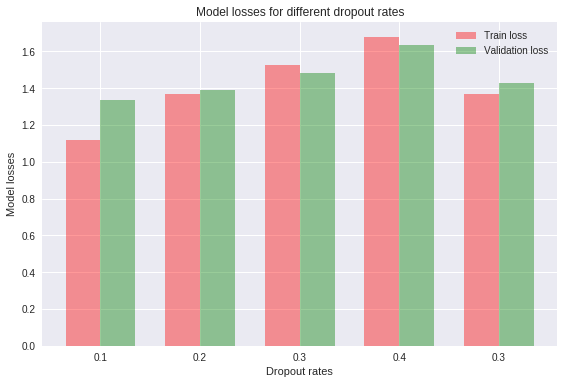

In [130]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_dr1.history['loss'].pop(), history_dr2.history['loss'].pop(), history_dr3.history['loss'].pop(),
              history_dr4.history['loss'].pop(), history_dr5.history['loss'].pop())
val_acc_models = (history_dr1.history['val_loss'].pop(), history_dr2.history['val_loss'].pop(), history_dr3.history['val_loss'].pop(),
                  history_dr4.history['val_loss'].pop(), history_dr5.history['val_loss'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train loss')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation loss')
ax.set_xlabel('Dropout rates')
ax.set_ylabel('Model losses')
ax.set_title('Model losses for different dropout rates')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('0.1', '0.2', '0.3', '0.4', '0.3'))
ax.legend()
fig.tight_layout()
plt.show()

**Its easy to conclude that only 0.2 and 0.3 dropout rates gave similar results with different number of epochs.So we conclude that dropout rate of 0.2 is perfect**

##Varying Activation function
###SELU

In [133]:
model_ac1 = createMLPModel(activationFunctions=['selu', 'selu', 'selu'])
model_ac1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_97 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_130 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_98 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_99 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 10)                5130      
Total para

In [134]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_ac1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_ac1 = model_ac1.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 3.9935 - acc: 0.1818 - val_loss: 1.9564 - val_acc: 0.2889
Epoch 2/30
 - 3s - loss: 2.2166 - acc: 0.2606 - val_loss: 1.7844 - val_acc: 0.3502
Epoch 3/30
 - 3s - loss: 2.0332 - acc: 0.3062 - val_loss: 1.6951 - val_acc: 0.3807
Epoch 4/30
 - 3s - loss: 1.8854 - acc: 0.3414 - val_loss: 1.6492 - val_acc: 0.4104
Epoch 5/30
 - 3s - loss: 1.7986 - acc: 0.3633 - val_loss: 1.6194 - val_acc: 0.4187
Epoch 6/30
 - 3s - loss: 1.7060 - acc: 0.3924 - val_loss: 1.5892 - val_acc: 0.4334
Epoch 7/30
 - 3s - loss: 1.6471 - acc: 0.4091 - val_loss: 1.5066 - val_acc: 0.4579
Epoch 8/30
 - 3s - loss: 1.5876 - acc: 0.4285 - val_loss: 1.4750 - val_acc: 0.4737
Epoch 9/30
 - 3s - loss: 1.5613 - acc: 0.4405 - val_loss: 1.4756 - val_acc: 0.4753
Epoch 10/30
 - 3s - loss: 1.5302 - acc: 0.4497 - val_loss: 1.5332 - val_acc: 0.4521
Epoch 11/30
 - 3s - loss: 1.5056 - acc: 0.4587 - val_loss: 1.4685 - val_acc: 0.4740
Epoch 12/30
 - 3s - loss: 1.4923 - 

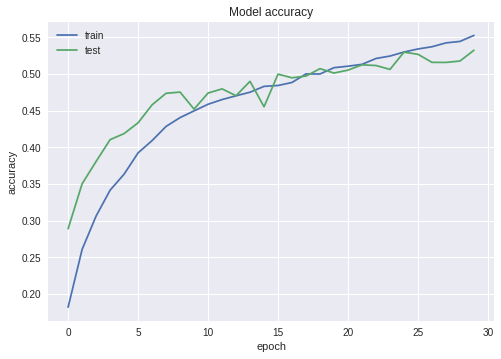

In [135]:
plotAccuracy(history_ac1.history)

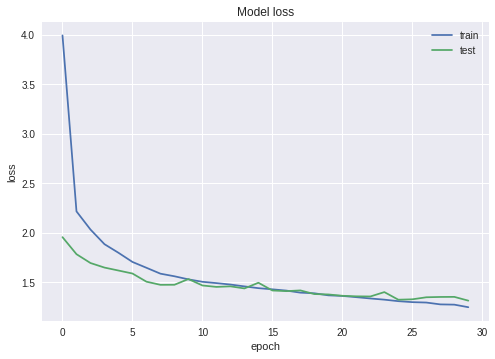

In [136]:
plotLoss(history_ac1.history)

**Scaled Exponential Linear Unit provides good accuracy and less differencec between training and validation loss.**

### TanH

In [137]:
model_ac2 = createMLPModel(activationFunctions=['tanh', 'tanh', 'tanh'])
model_ac2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_100 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_134 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_101 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_135 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_102 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 10)                5130      
Total para

In [138]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_ac2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_ac2 = model_ac2.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 2.2646 - acc: 0.1889 - val_loss: 1.9637 - val_acc: 0.2786
Epoch 2/30
 - 3s - loss: 2.0023 - acc: 0.2715 - val_loss: 1.8281 - val_acc: 0.3422
Epoch 3/30
 - 3s - loss: 1.9101 - acc: 0.3075 - val_loss: 1.7492 - val_acc: 0.3612
Epoch 4/30
 - 3s - loss: 1.8521 - acc: 0.3290 - val_loss: 1.8240 - val_acc: 0.3399
Epoch 5/30
 - 3s - loss: 1.8052 - acc: 0.3487 - val_loss: 1.7031 - val_acc: 0.3752
Epoch 6/30
 - 3s - loss: 1.7765 - acc: 0.3566 - val_loss: 1.6725 - val_acc: 0.3885
Epoch 7/30
 - 3s - loss: 1.7657 - acc: 0.3634 - val_loss: 1.7061 - val_acc: 0.3913
Epoch 8/30
 - 3s - loss: 1.7286 - acc: 0.3781 - val_loss: 1.6662 - val_acc: 0.4010
Epoch 9/30
 - 3s - loss: 1.7175 - acc: 0.3799 - val_loss: 1.6403 - val_acc: 0.4126
Epoch 10/30
 - 3s - loss: 1.7084 - acc: 0.3851 - val_loss: 1.6193 - val_acc: 0.4134
Epoch 11/30
 - 3s - loss: 1.6968 - acc: 0.3857 - val_loss: 1.6281 - val_acc: 0.4080
Epoch 12/30
 - 3s - loss: 1.6741 - 

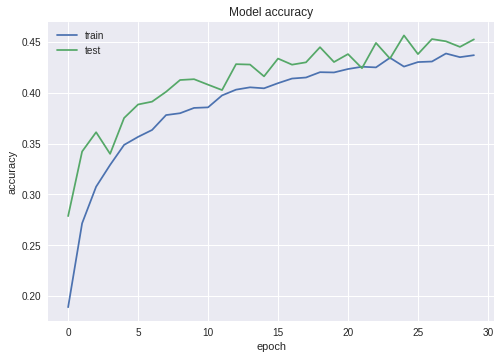

In [139]:
plotAccuracy(history_ac2.history)

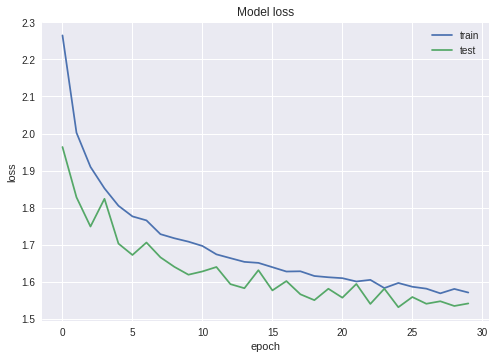

In [140]:
plotLoss(history_ac2.history)

**The activation function is not helping the model to overcome underfitting as compared to SELU.**

###PReLU

In [149]:
model_ac3 = createMLPModel(activationFunctions=['PReLU', 'PReLU', 'PReLU'])
model_ac3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 1024)              1024      
_________________________________________________________________
dropout_103 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_142 (Dense)            (None, 512)               524800    
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 512)               512       
_________________________________________________________________
dropout_104 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 512)               262656    
__________

In [150]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_ac3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_ac3 = model_ac3.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 1.9776 - acc: 0.2780 - val_loss: 1.8160 - val_acc: 0.3438
Epoch 2/30
 - 4s - loss: 1.7829 - acc: 0.3535 - val_loss: 1.6664 - val_acc: 0.3995
Epoch 3/30
 - 4s - loss: 1.7091 - acc: 0.3875 - val_loss: 1.6454 - val_acc: 0.4095
Epoch 4/30
 - 4s - loss: 1.6491 - acc: 0.4075 - val_loss: 1.5556 - val_acc: 0.4450
Epoch 5/30
 - 4s - loss: 1.6105 - acc: 0.4204 - val_loss: 1.5083 - val_acc: 0.4617
Epoch 6/30
 - 5s - loss: 1.5726 - acc: 0.4372 - val_loss: 1.4987 - val_acc: 0.4648
Epoch 7/30
 - 5s - loss: 1.5433 - acc: 0.4454 - val_loss: 1.4742 - val_acc: 0.4692
Epoch 8/30
 - 5s - loss: 1.5226 - acc: 0.4556 - val_loss: 1.4497 - val_acc: 0.4851
Epoch 9/30
 - 4s - loss: 1.5042 - acc: 0.4622 - val_loss: 1.4569 - val_acc: 0.4883
Epoch 10/30
 - 4s - loss: 1.4872 - acc: 0.4684 - val_loss: 1.4364 - val_acc: 0.4969
Epoch 11/30
 - 4s - loss: 1.4689 - acc: 0.4769 - val_loss: 1.4487 - val_acc: 0.4791
Epoch 12/30
 - 4s - loss: 1.4391 - 

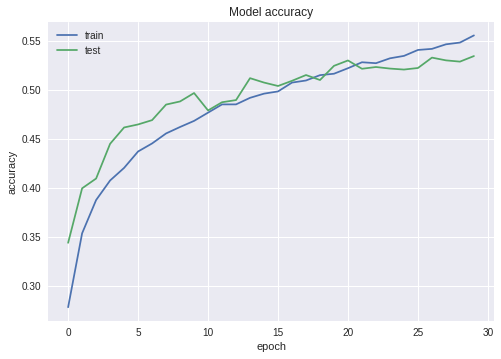

In [151]:
plotAccuracy(history_ac3.history)

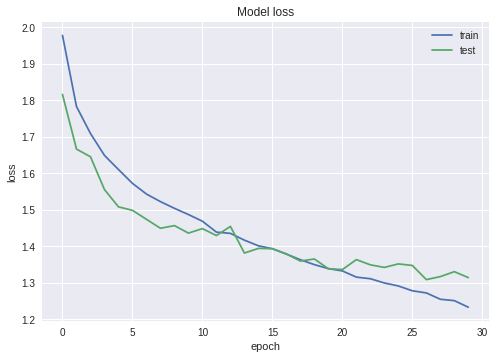

In [152]:
plotLoss(history_ac3.history)

**The plots clearly suggests that PReLU is better than SeLU because it maintains enough bias to not underfit as well as provide higher accuracy.**

###LeakyReLU

In [153]:
model_ac4 = createMLPModel(activationFunctions=['LeakyReLU', 'LeakyReLU', 'LeakyReLU'])
model_ac4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_106 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_146 (Dense)            (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_107 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 512)               262656    
__________

In [154]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_ac4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_ac4 = model_ac4.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 2.1349 - acc: 0.2624 - val_loss: 1.8045 - val_acc: 0.3637
Epoch 2/30
 - 4s - loss: 1.8410 - acc: 0.3388 - val_loss: 1.6819 - val_acc: 0.4109
Epoch 3/30
 - 4s - loss: 1.7786 - acc: 0.3637 - val_loss: 1.7052 - val_acc: 0.3955
Epoch 4/30
 - 4s - loss: 1.7127 - acc: 0.3915 - val_loss: 1.6702 - val_acc: 0.4087
Epoch 5/30
 - 4s - loss: 1.6721 - acc: 0.4051 - val_loss: 1.6040 - val_acc: 0.4255
Epoch 6/30
 - 4s - loss: 1.6289 - acc: 0.4213 - val_loss: 1.5869 - val_acc: 0.4222
Epoch 7/30
 - 4s - loss: 1.6027 - acc: 0.4282 - val_loss: 1.5804 - val_acc: 0.4387
Epoch 8/30
 - 4s - loss: 1.5758 - acc: 0.4381 - val_loss: 1.5666 - val_acc: 0.4457
Epoch 9/30
 - 4s - loss: 1.5657 - acc: 0.4427 - val_loss: 1.5233 - val_acc: 0.4492
Epoch 10/30
 - 4s - loss: 1.5256 - acc: 0.4561 - val_loss: 1.5100 - val_acc: 0.4585
Epoch 11/30
 - 4s - loss: 1.5126 - acc: 0.4617 - val_loss: 1.4992 - val_acc: 0.4531
Epoch 12/30
 - 4s - loss: 1.4997 - 

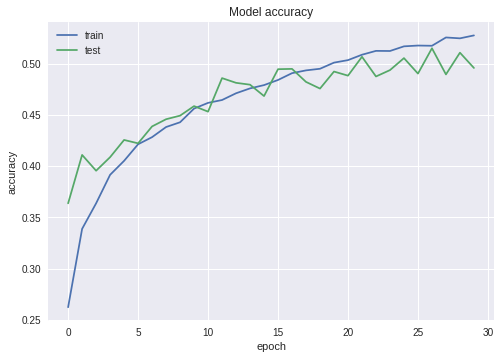

In [155]:
plotAccuracy(history_ac4.history)

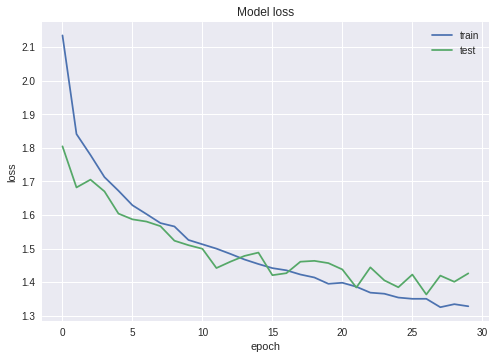

In [156]:
plotLoss(history_ac4.history)

**The plot is like that of TanH and is not better than PReLU**

##Analysis of variation of Activation functions

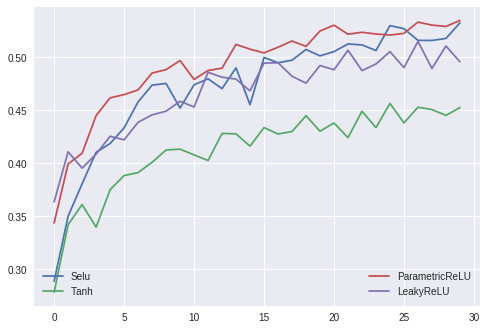

In [157]:
ax = plt.subplot(111)
plt.plot(history_ac1.history['val_acc'], label="Selu")
plt.plot(history_ac2.history['val_acc'], label="Tanh")
plt.plot(history_ac3.history['val_acc'], label="ParametricReLU")
plt.plot(history_ac4.history['val_acc'], label="LeakyReLU")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

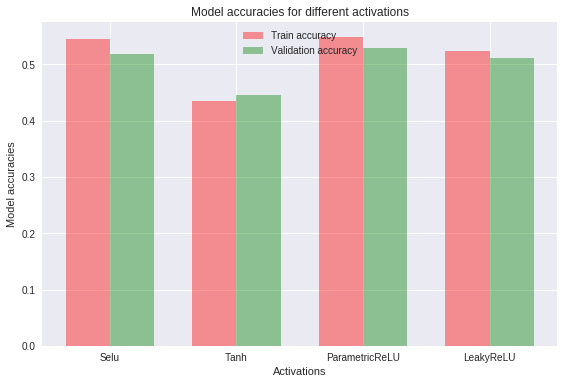

In [159]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(4)
acc_models = (history_ac1.history['acc'].pop(), history_ac2.history['acc'].pop(), history_ac3.history['acc'].pop(),
              history_ac4.history['acc'].pop())
val_acc_models = (history_ac1.history['val_acc'].pop(), history_ac2.history['val_acc'].pop(), history_ac3.history['val_acc'].pop(),
                  history_ac4.history['val_acc'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train accuracy')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation accuracy')
ax.set_xlabel('Activations')
ax.set_ylabel('Model accuracies')
ax.set_title('Model accuracies for different activations')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Selu', 'Tanh', 'ParametricReLU', 'LeakyReLU'))
ax.legend()
fig.tight_layout()
plt.show()

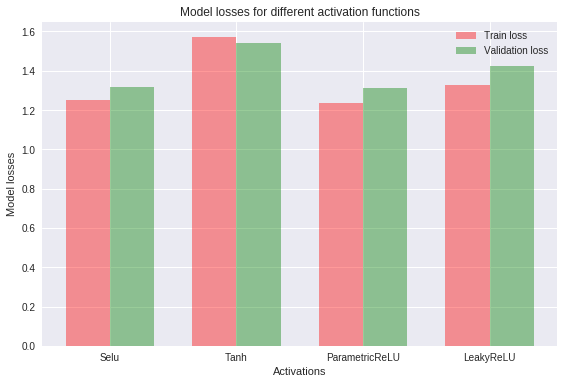

In [160]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(4)
acc_models = (history_ac1.history['loss'].pop(), history_ac2.history['loss'].pop(), history_ac3.history['loss'].pop(),
              history_ac4.history['loss'].pop())
val_acc_models = (history_ac1.history['val_loss'].pop(), history_ac2.history['val_loss'].pop(), history_ac3.history['val_loss'].pop(),
                  history_ac4.history['val_loss'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train loss')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation loss')
ax.set_xlabel('Activations')
ax.set_ylabel('Model losses')
ax.set_title('Model losses for different activation functions')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Selu', 'Tanh', 'ParametricReLU', 'LeakyReLU'))
ax.legend()
fig.tight_layout()
plt.show()

**We have tried 4 different activations with standard default 'relu' activation. The Parametric Rectified Linear Unit (PReLU) generalizes the traditional rectified unit. PReLU improves model fitting with nearly zero extra computational cost and little overfitting risk.**

##Varying Network Configuration
### Config 1
- Dense(1024)
- Dense(3072)

In [9]:
model_nc1 = createMLPModel(numLayers=2, layersType=['Dense', 'Dense'], activationFunctions=['PReLU', 'PReLU'], numNeurons=[1024, 3072])
model_nc1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 1024)              1024      
_________________________________________________________________
dense_2 (Dense)              (None, 3072)              3148800   
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 3072)              3072      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30730     
Total params: 6,330,378
Trainable params: 6,330,378
Non-trainable params: 0
_________________________________________________________________


In [10]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_nc1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_nc1 = model_nc1.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 5s - loss: 1.9257 - acc: 0.3195 - val_loss: 1.7003 - val_acc: 0.3842
Epoch 2/30
 - 4s - loss: 1.6583 - acc: 0.4049 - val_loss: 1.5913 - val_acc: 0.4372
Epoch 3/30
 - 4s - loss: 1.5622 - acc: 0.4410 - val_loss: 1.5159 - val_acc: 0.4667
Epoch 4/30
 - 4s - loss: 1.5071 - acc: 0.4606 - val_loss: 1.5370 - val_acc: 0.4558
Epoch 5/30
 - 4s - loss: 1.4536 - acc: 0.4815 - val_loss: 1.4908 - val_acc: 0.4642
Epoch 6/30
 - 4s - loss: 1.4177 - acc: 0.4958 - val_loss: 1.5081 - val_acc: 0.4590
Epoch 7/30
 - 4s - loss: 1.3808 - acc: 0.5081 - val_loss: 1.4142 - val_acc: 0.5017
Epoch 8/30
 - 4s - loss: 1.3427 - acc: 0.5216 - val_loss: 1.4173 - val_acc: 0.4946
Epoch 9/30
 - 4s - loss: 1.3138 - acc: 0.5313 - val_loss: 1.4183 - val_acc: 0.5014
Epoch 10/30
 - 4s - loss: 1.2807 - acc: 0.5435 - val_loss: 1.4097 - val_acc: 0.5025
Epoch 11/30
 - 4s - loss: 1.2547 - acc: 0.5554 - val_loss: 1.3965 - val_acc: 0.5064
Epoch 12/30
 - 4s - loss: 1.2208 - 

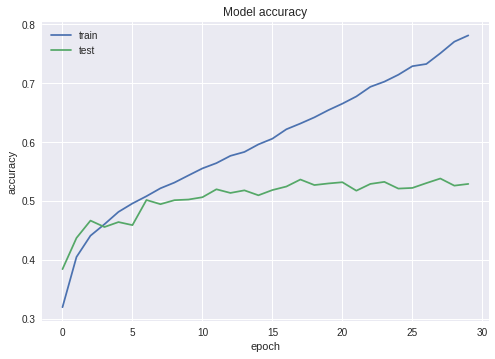

In [11]:
plotAccuracy(history_nc1.history)

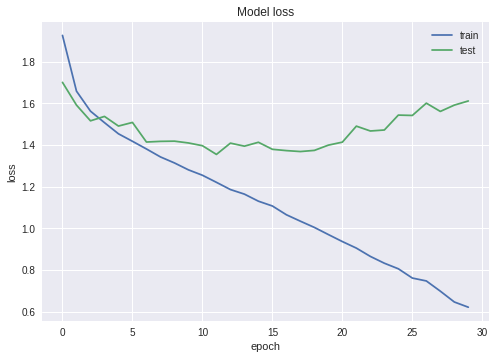

In [12]:
plotLoss(history_nc1.history)

**The plots shows that the model is overfitting itself on the training data points and thus inducing high variance in the network.**

### Config 2
- Dense(1024)
- Dropout(0.2)
- Dense(3072)
- Dropout(0.2)

In [13]:
model_nc2 = createMLPModel(numLayers=4, layersType=['Dense', 'Dropout', 'Dense', 'Dropout'],
                           activationFunctions=['PReLU', 'PReLU'], numNeurons=[1024, 3072])
model_nc2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 1024)              1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3072)              3148800   
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 3072)              3072      
_________________________________________________________________
dropout_2 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30730     
Total para

In [14]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_nc2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_nc2 = model_nc2.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 5s - loss: 1.9701 - acc: 0.2899 - val_loss: 1.7622 - val_acc: 0.3602
Epoch 2/30
 - 4s - loss: 1.7697 - acc: 0.3592 - val_loss: 1.7161 - val_acc: 0.3758
Epoch 3/30
 - 4s - loss: 1.7019 - acc: 0.3886 - val_loss: 1.6467 - val_acc: 0.4137
Epoch 4/30
 - 4s - loss: 1.6572 - acc: 0.4048 - val_loss: 1.5696 - val_acc: 0.4434
Epoch 5/30
 - 4s - loss: 1.6110 - acc: 0.4209 - val_loss: 1.5405 - val_acc: 0.4532
Epoch 6/30
 - 4s - loss: 1.5931 - acc: 0.4299 - val_loss: 1.5461 - val_acc: 0.4461
Epoch 7/30
 - 4s - loss: 1.5700 - acc: 0.4363 - val_loss: 1.4920 - val_acc: 0.4675
Epoch 8/30
 - 4s - loss: 1.5433 - acc: 0.4491 - val_loss: 1.4988 - val_acc: 0.4676
Epoch 9/30
 - 4s - loss: 1.5330 - acc: 0.4523 - val_loss: 1.4800 - val_acc: 0.4731
Epoch 10/30
 - 4s - loss: 1.5116 - acc: 0.4578 - val_loss: 1.4871 - val_acc: 0.4649
Epoch 11/30
 - 4s - loss: 1.4947 - acc: 0.4637 - val_loss: 1.4445 - val_acc: 0.4810
Epoch 12/30
 - 4s - loss: 1.4736 - 

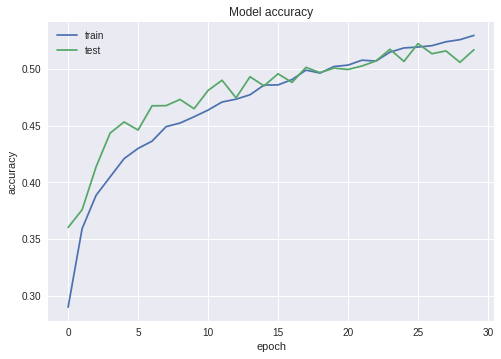

In [15]:
plotAccuracy(history_nc2.history)

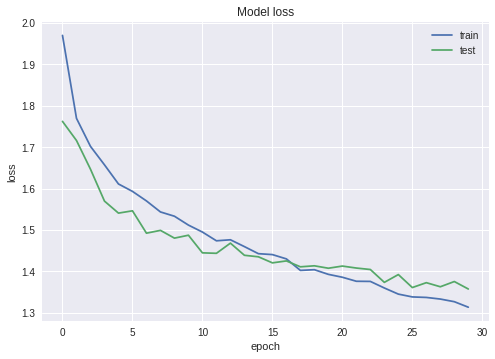

In [16]:
plotLoss(history_nc2.history)

**Adding dropout layer actually is beneficial as it avoids overfitting of the model.**

### Config 3
- Dense(1024)
- Dropout(0.2)
- Dense(512)
- Dropout(0.2)

In [18]:
model_nc3 = createMLPModel(numLayers=4, layersType=['Dense', 'Dropout', 'Dense', 'Dropout'],
                           activationFunctions=['PReLU', 'PReLU'], numNeurons=[1024, 512])
model_nc3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
p_re_lu_7 (PReLU)            (None, 1024)              1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 512)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total para

In [19]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_nc3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_nc3 = model_nc3.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 2.0260 - acc: 0.2787 - val_loss: 1.8297 - val_acc: 0.3431
Epoch 2/30
 - 3s - loss: 1.7767 - acc: 0.3610 - val_loss: 1.6803 - val_acc: 0.4153
Epoch 3/30
 - 3s - loss: 1.7055 - acc: 0.3883 - val_loss: 1.6349 - val_acc: 0.4172
Epoch 4/30
 - 3s - loss: 1.6564 - acc: 0.4042 - val_loss: 1.6038 - val_acc: 0.4266
Epoch 5/30
 - 3s - loss: 1.6096 - acc: 0.4227 - val_loss: 1.5314 - val_acc: 0.4564
Epoch 6/30
 - 3s - loss: 1.5741 - acc: 0.4371 - val_loss: 1.5373 - val_acc: 0.4485
Epoch 7/30
 - 3s - loss: 1.5491 - acc: 0.4465 - val_loss: 1.5048 - val_acc: 0.4578
Epoch 8/30
 - 3s - loss: 1.5300 - acc: 0.4546 - val_loss: 1.4645 - val_acc: 0.4829
Epoch 9/30
 - 3s - loss: 1.5082 - acc: 0.4612 - val_loss: 1.4858 - val_acc: 0.4720
Epoch 10/30
 - 3s - loss: 1.4883 - acc: 0.4685 - val_loss: 1.4472 - val_acc: 0.4870
Epoch 11/30
 - 3s - loss: 1.4727 - acc: 0.4752 - val_loss: 1.4496 - val_acc: 0.4895
Epoch 12/30
 - 3s - loss: 1.4576 - 

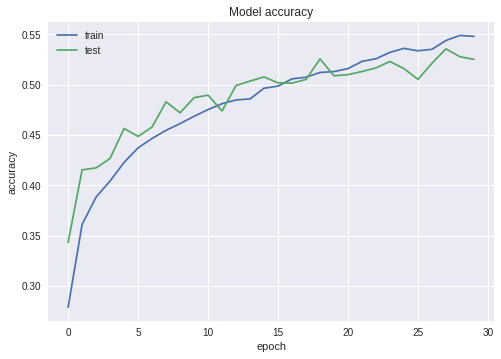

In [20]:
plotAccuracy(history_nc3.history)

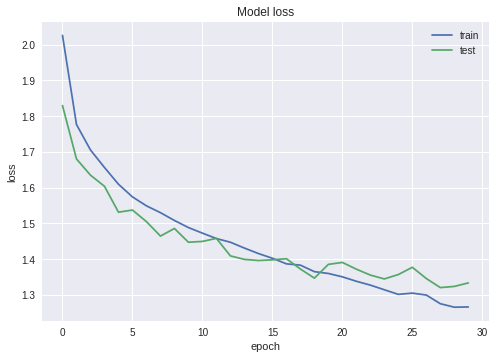

In [21]:
plotLoss(history_nc3.history)

**Not a stable model. It shows that its better to have a 2nd dense layer with more neurons for better accuracy and stability**

###Config - 4
- Dense(512)
- Dropout(0.2)
- Dense(1024)
- Dropout(0.2)

In [22]:
model_nc4 = createMLPModel(numLayers=4, layersType=['Dense', 'Dropout', 'Dense', 'Dropout'],
                           activationFunctions=['PReLU', 'PReLU'], numNeurons=[512, 1024])
model_nc4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
p_re_lu_9 (PReLU)            (None, 512)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
p_re_lu_10 (PReLU)           (None, 1024)              1024      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total para

In [23]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_nc4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_nc4 = model_nc4.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 1.9497 - acc: 0.2928 - val_loss: 1.7501 - val_acc: 0.3712
Epoch 2/30
 - 3s - loss: 1.7720 - acc: 0.3610 - val_loss: 1.6822 - val_acc: 0.4004
Epoch 3/30
 - 3s - loss: 1.7215 - acc: 0.3829 - val_loss: 1.6459 - val_acc: 0.4103
Epoch 4/30
 - 3s - loss: 1.6543 - acc: 0.4070 - val_loss: 1.5630 - val_acc: 0.4403
Epoch 5/30
 - 3s - loss: 1.6154 - acc: 0.4211 - val_loss: 1.5299 - val_acc: 0.4551
Epoch 6/30
 - 3s - loss: 1.5893 - acc: 0.4310 - val_loss: 1.5311 - val_acc: 0.4600
Epoch 7/30
 - 3s - loss: 1.5704 - acc: 0.4380 - val_loss: 1.5016 - val_acc: 0.4616
Epoch 8/30
 - 3s - loss: 1.5536 - acc: 0.4416 - val_loss: 1.4751 - val_acc: 0.4712
Epoch 9/30
 - 3s - loss: 1.5319 - acc: 0.4531 - val_loss: 1.4703 - val_acc: 0.4725
Epoch 10/30
 - 3s - loss: 1.5158 - acc: 0.4541 - val_loss: 1.4533 - val_acc: 0.4778
Epoch 11/30
 - 3s - loss: 1.5032 - acc: 0.4621 - val_loss: 1.4487 - val_acc: 0.4873
Epoch 12/30
 - 3s - loss: 1.4785 - 

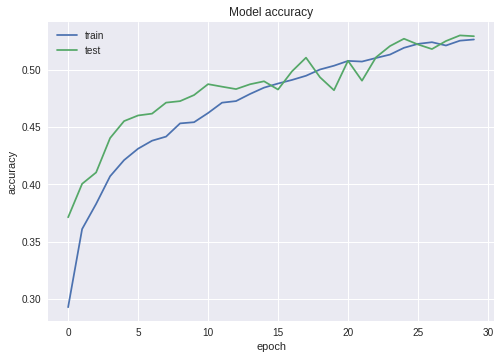

In [24]:
plotAccuracy(history_nc4.history)

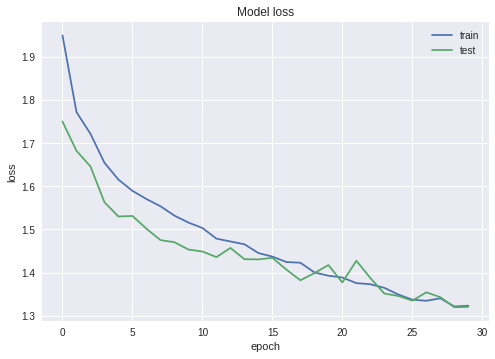

In [25]:
plotLoss(history_nc4.history)

**Its the best model so far. There is no underfitting or overfitting. The accuracy might be less but its better than all other models tried and it has low bias and low variance.**

###Config - 5
- Dense(512)
- Dropout(0.2)
- Dense(1024)
- Dropout(0.2)
- Dense(1024)
- Dropout(0.2)

In [26]:
model_nc5 = createMLPModel(numLayers=6, layersType=['Dense', 'Dropout', 'Dense', 'Dropout', 'Dense', 'Dropout'],
                           activationFunctions=['PReLU', 'PReLU', 'PReLU'], numNeurons=[512, 1024, 1024])
model_nc5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
p_re_lu_11 (PReLU)           (None, 512)               512       
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
p_re_lu_12 (PReLU)           (None, 1024)              1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1049600   
__________

In [27]:
adam = optimizers.Adam(lr=0.001, decay=0.000001)
model_nc5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_nc5 = model_nc5.fit(x_train, y_train, batch_size=256, epochs=30, verbose=2, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 1.9468 - acc: 0.2880 - val_loss: 1.8175 - val_acc: 0.3456
Epoch 2/30
 - 3s - loss: 1.7909 - acc: 0.3521 - val_loss: 1.6682 - val_acc: 0.3976
Epoch 3/30
 - 3s - loss: 1.7150 - acc: 0.3827 - val_loss: 1.6409 - val_acc: 0.4102
Epoch 4/30
 - 3s - loss: 1.6682 - acc: 0.4004 - val_loss: 1.5771 - val_acc: 0.4328
Epoch 5/30
 - 3s - loss: 1.6322 - acc: 0.4154 - val_loss: 1.5483 - val_acc: 0.4420
Epoch 6/30
 - 3s - loss: 1.6057 - acc: 0.4230 - val_loss: 1.5229 - val_acc: 0.4510
Epoch 7/30
 - 3s - loss: 1.5780 - acc: 0.4332 - val_loss: 1.5175 - val_acc: 0.4560
Epoch 8/30
 - 3s - loss: 1.5556 - acc: 0.4427 - val_loss: 1.5074 - val_acc: 0.4620
Epoch 9/30
 - 3s - loss: 1.5264 - acc: 0.4541 - val_loss: 1.4793 - val_acc: 0.4693
Epoch 10/30
 - 3s - loss: 1.5133 - acc: 0.4562 - val_loss: 1.4632 - val_acc: 0.4750
Epoch 11/30
 - 3s - loss: 1.5015 - acc: 0.4637 - val_loss: 1.4357 - val_acc: 0.4897
Epoch 12/30
 - 3s - loss: 1.4703 - 

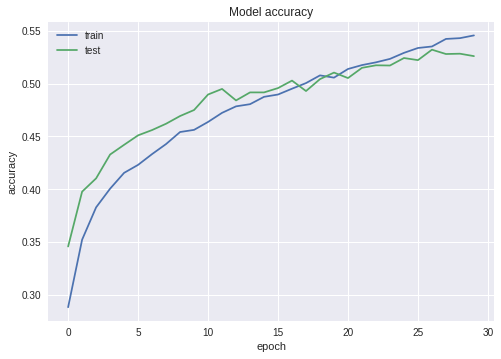

In [28]:
plotAccuracy(history_nc5.history)

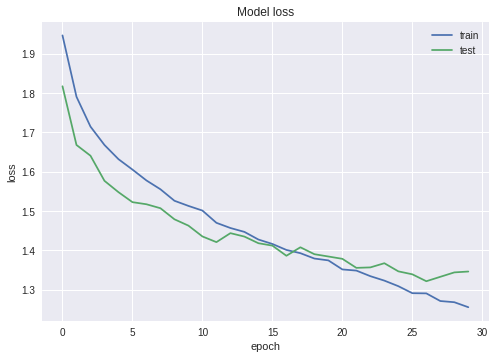

In [29]:
plotLoss(history_nc5.history)

**Increasing the network depth and making complex network doesn't really help in this dataset.**

##Analysis of variation in network configuration 

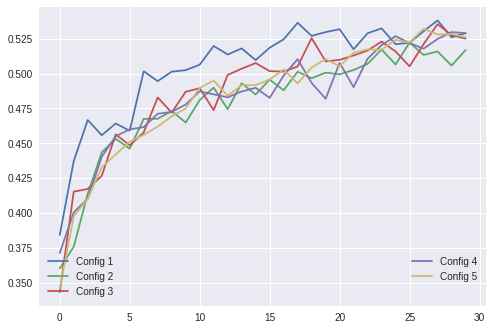

In [30]:
ax = plt.subplot(111)
plt.plot(history_nc1.history['val_acc'], label="Config 1")
plt.plot(history_nc2.history['val_acc'], label="Config 2")
plt.plot(history_nc3.history['val_acc'], label="Config 3")
plt.plot(history_nc4.history['val_acc'], label="Config 4")
plt.plot(history_nc5.history['val_acc'], label="Config 5")
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()

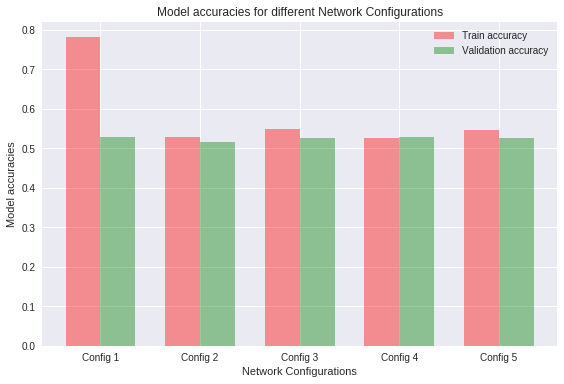

In [31]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_nc1.history['acc'].pop(), history_nc2.history['acc'].pop(), history_nc3.history['acc'].pop(),
              history_nc4.history['acc'].pop(), history_nc5.history['acc'].pop())
val_acc_models = (history_nc1.history['val_acc'].pop(), history_nc2.history['val_acc'].pop(), history_nc3.history['val_acc'].pop(),
                  history_nc4.history['val_acc'].pop(), history_nc5.history['val_acc'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train accuracy')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation accuracy')
ax.set_xlabel('Network Configurations')
ax.set_ylabel('Model accuracies')
ax.set_title('Model accuracies for different Network Configurations')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Config 1', 'Config 2', 'Config 3', 'Config 4', 'Config 5'))
ax.legend()
fig.tight_layout()
plt.show()

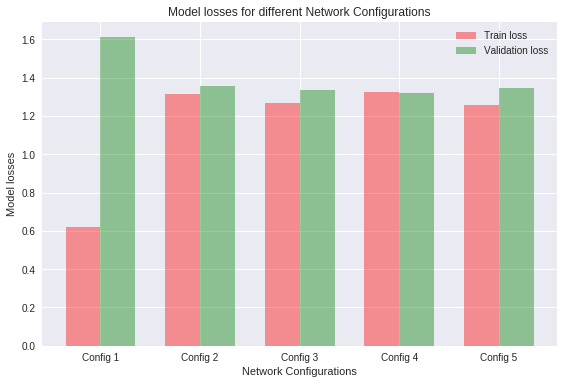

In [32]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
index = np.arange(5)
acc_models = (history_nc1.history['loss'].pop(), history_nc2.history['loss'].pop(), history_nc3.history['loss'].pop(),
              history_nc4.history['loss'].pop(), history_nc5.history['loss'].pop())
val_acc_models = (history_nc1.history['val_loss'].pop(), history_nc2.history['val_loss'].pop(), history_nc3.history['val_loss'].pop(),
                  history_nc4.history['val_loss'].pop(), history_nc5.history['val_loss'].pop())
rects1 = ax.bar(index, acc_models, bar_width,
                alpha=opacity, color='r',
                label='Train loss')

rects2 = ax.bar(index + bar_width, val_acc_models, bar_width,
                alpha=opacity, color='g',
                label='Validation loss')
ax.set_xlabel('Network Configurations')
ax.set_ylabel('Model losses')
ax.set_title('Model losses for different Network Configurations')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Config 1', 'Config 2', 'Config 3', 'Config 4', 'Config 5'))
ax.legend()
fig.tight_layout()
plt.show()

**It is clearly evident from the plots that config 4 is the best as it has less difference in training and validation losses as well as accuracies.**

#Best MLP model
**Config**
- Dense(512)
- Dropout(0.2)
- Dense(1024)
- Dropout(0.2)

**Activation - PReLU,
Batch Size - 256,
Epochs - 30,
Learning Rate - 0.001,
Dropout Rate - 0.2**

**The model is not overfit or underfit. It doesn't use much of computational resources as the batch_size is 256 and number of epochs are only 30. The activation used is advanced ReLU activation which makes the model better than the rest. Along with this, optimal learning rate of 0.001 and dropout rate of 0.2 to reach the convergence.**

**The model can be made better by merging the train and test datasets and then shuffling them, split them and then perform data augmentation once again on the training data.**